In [41]:
GROUP_NUMBER = "10"
COLLABORATORS = [""]

# GROUP ASSIGNMENT - Foundations of Data Science (December, 2024)

# Canada Food Prices

## Outline of the Report

**Objectives:** 
1. What are the goals of the analysis and why did you choose them? What question(s) do you want to answer? 
2. What hypothesis(es) do you have and what is your approach to tackle the problem?
**Data Preparation:**

1.  What was your data source (e.g., web scraping, corporate data, a standard machine learning data set, open data, etc.)?
2.  How good was the data quality?
3.  What did you need to do to procure it?
4.  What tools or code did you need to use to prepare it for analysis?
5.  What challenges did you face


**Analysis:** 

1. What trends, correlations, and/or patterns do you see in the data?


**Conclusions:** 

1. What did you learn about your data set?**.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

np.random.seed(12345)
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

# For temporal data types
from datetime import datetime
from datetime import timedelta

# For grabbing data sets
import requests

# For hiding code blocks, as they aren't necessary at this point
from IPython.display import HTML

In [5]:
# Load Data

retail_food_prices = pd.read_csv('retailfoodprices.csv', usecols=["REF_DATE",
                                                                    "GEO",
                                                                    "DGUID",
                                                                    "Products",
                                                                    "UOM",
                                                                    "UOM_ID",
                                                                    "SCALAR_FACTOR",
                                                                    "SCALAR_ID",
                                                                    "VECTOR",
                                                                    "COORDINATE",
                                                                    "VALUE",
                                                                    "STATUS",
                                                                    "SYMBOL",
                                                                    "TERMINATED",
                                                                    "DECIMALS"
                                                                    ])
retail_food_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101556 entries, 0 to 101555
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   REF_DATE       101556 non-null  object 
 1   GEO            101556 non-null  object 
 2   DGUID          101556 non-null  object 
 3   Products       101556 non-null  object 
 4   UOM            101556 non-null  object 
 5   UOM_ID         101556 non-null  int64  
 6   SCALAR_FACTOR  101556 non-null  object 
 7   SCALAR_ID      101556 non-null  int64  
 8   VECTOR         101556 non-null  object 
 9   COORDINATE     101556 non-null  float64
 10  VALUE          101556 non-null  float64
 11  STATUS         0 non-null       float64
 12  SYMBOL         0 non-null       float64
 13  TERMINATED     0 non-null       float64
 14  DECIMALS       101556 non-null  int64  
dtypes: float64(5), int64(3), object(7)
memory usage: 11.6+ MB


In [7]:
df_retail_food_prices= retail_food_prices.drop([
                                                'UOM',
                                                'UOM_ID',
                                                'SCALAR_ID',
                                                'VECTOR',
                                                'COORDINATE',
                                                'STATUS',
                                                'SYMBOL',
                                                'TERMINATED',
                                                'DECIMALS'], axis=1)

df_retail_food_prices.head(3)

,REF_DATE,GEO,DGUID,Products,SCALAR_FACTOR,VALUE
0,2017-10,Canada,2016A000011124,"Beef stewing cuts, per kilogram",units,13.41
1,2017-11,Canada,2016A000011124,"Beef stewing cuts, per kilogram",units,13.35
2,2017-12,Canada,2016A000011124,"Beef stewing cuts, per kilogram",units,13.90


In [81]:
df_retail_food_prices['Products'].unique()

array(['Beef stewing cuts, per kilogram',
       'Beef striploin cuts, per kilogram',
       'Beef top sirloin cuts, per kilogram',
       'Beef rib cuts, per kilogram', 'Ground beef, per kilogram',
       'Pork loin cuts, per kilogram', 'Pork rib cuts, per kilogram',
       'Pork shoulder cuts, per kilogram', 'Whole chicken, per kilogram',
       'Chicken breasts, per kilogram', 'Chicken thigh, per kilogram',
       'Chicken drumsticks, per kilogram', 'Bacon, 500 grams',
       'Wieners, 400 grams', 'Salmon, per kilogram', 'Shrimp, 300 grams',
       'Canned salmon, 213 grams', 'Canned tuna, 170 grams',
       'Meatless burgers, 226 grams', 'Milk, 1 litre', 'Milk, 2 litres',
       'Milk, 4 litres', 'Soy milk, 1.89 litres', 'Nut milk, 1.89 litres',
       'Cream, 1 litre', 'Butter, 454 grams', 'Margarine, 907 grams',
       'Block cheese, 500 grams', 'Yogurt, 500 grams', 'Eggs, 1 dozen',
       'Apples, per kilogram', 'Oranges, per kilogram',
       'Oranges, 1.36 kilograms', 'Bananas

In [ ]:
# Observations of the products:
# data entry are 'products, units' form. Need to separate the units to a new column.
# units are very different, e.g., grams, kilograms, litres etc. make it unitform, e.g., per kg, per litre, per unit etc. 
# similar kind of product description, e.g., 5 different entries only for beef. rename all beef items as 'beef' and so on.

In [9]:
# Adding a "units" column by extracting the text after the comma and space in the 'Products' column
df_retail_food_prices['units'] = df_retail_food_prices['Products'].str.split(', ').str[1]

# Removing any leftover commas or spaces in the "units" column
df_retail_food_prices['units'] = df_retail_food_prices['units'].str.replace(',', '').str.strip()

# Displaying the updated dataframe
df_retail_food_prices


,REF_DATE,GEO,DGUID,Products,SCALAR_FACTOR,VALUE,units
0,2017-10,Canada,2016A000011124,"Beef stewing cuts, per kilogram",units,13.41,per kilogram
1,2017-11,Canada,2016A000011124,"Beef stewing cuts, per kilogram",units,13.35,per kilogram
2,2017-12,Canada,2016A000011124,"Beef stewing cuts, per kilogram",units,13.90,per kilogram
3,2018-01,Canada,2016A000011124,"Beef stewing cuts, per kilogram",units,12.97,per kilogram
4,2018-02,Canada,2016A000011124,"Beef stewing cuts, per kilogram",units,12.61,per kilogram
...,...,...,...,...,...,...,...
101551,2024-05,British Columbia,2016A000259,"Laundry detergent, 4.43 litres",units,13.67,4.43 litres
101552,2024-06,British Columbia,2016A000259,"Laundry detergent, 4.43 litres",units,13.61,4.43 litres
101553,2024-07,British Columbia,2016A000259,"Laundry detergent, 4.43 litres",units,12.86,4.43 litres
101554,2024-08,British Columbia,2016A000259,"Laundry detergent, 4.43 litres",units,13.66,4.43 litres


In [13]:
# Removing values in 'Products' column starting from the comma "," till the end
df_retail_food_prices['Products'] = df_retail_food_prices['Products'].str.split(', ').str[0]

# Displaying the updated dataframe
df_retail_food_prices


,REF_DATE,GEO,DGUID,Products,SCALAR_FACTOR,VALUE,units
0,2017-10,Canada,2016A000011124,Beef stewing cuts,units,13.41,per kilogram
1,2017-11,Canada,2016A000011124,Beef stewing cuts,units,13.35,per kilogram
2,2017-12,Canada,2016A000011124,Beef stewing cuts,units,13.90,per kilogram
3,2018-01,Canada,2016A000011124,Beef stewing cuts,units,12.97,per kilogram
4,2018-02,Canada,2016A000011124,Beef stewing cuts,units,12.61,per kilogram
...,...,...,...,...,...,...,...
101551,2024-05,British Columbia,2016A000259,Laundry detergent,units,13.67,4.43 litres
101552,2024-06,British Columbia,2016A000259,Laundry detergent,units,13.61,4.43 litres
101553,2024-07,British Columbia,2016A000259,Laundry detergent,units,12.86,4.43 litres
101554,2024-08,British Columbia,2016A000259,Laundry detergent,units,13.66,4.43 litres


In [15]:
df_retail_food_prices_meat = df_retail_food_prices[
    (df_retail_food_prices['GEO'] == 'Canada') & 
    ( 
    (df_retail_food_prices['Products'] == 'Beef stewing cuts')
    |(df_retail_food_prices['Products'] == 'Beef striploin cuts')
    |(df_retail_food_prices['Products'] == 'Beef top sirloin cuts')
    |(df_retail_food_prices['Products'] == 'Beef rib cuts')
    |(df_retail_food_prices['Products'] == 'Ground beef')
    |(df_retail_food_prices['Products'] == 'Pork loin cuts')
    |(df_retail_food_prices['Products'] == 'Pork rib cuts')
    |(df_retail_food_prices['Products'] == 'Pork shoulder cuts')
    |(df_retail_food_prices['Products'] == 'Whole chicken')
    |(df_retail_food_prices['Products'] == 'Chicken breasts')
    |(df_retail_food_prices['Products'] == 'Chicken thigh')
    |(df_retail_food_prices['Products'] == 'Chicken drumsticks') 
    )
]

In [59]:
df_retail_food_prices_fish = df_retail_food_prices[
    (df_retail_food_prices['GEO'] == 'Canada') & 
    ( 
     (df_retail_food_prices['Products'] == 'Salmon')
	|(df_retail_food_prices['Products'] == 'Shrimp')
	|(df_retail_food_prices['Products'] == 'Canned salmon')
	|(df_retail_food_prices['Products'] == 'Canned tuna')

    )
]

In [61]:
# convert the unit prices to per kilogram
df_retail_food_prices_fish.loc[
    df_retail_food_prices_fish['units'] == '300 grams', 'VALUE'
] = df_retail_food_prices_fish.loc[df_retail_food_prices_fish['units'] == '300 grams', 'VALUE'] * 3.33

df_retail_food_prices_fish.loc[
    df_retail_food_prices_fish['units'] == '213 grams', 'VALUE'
] = df_retail_food_prices_fish.loc[df_retail_food_prices_fish['units'] == '213 grams', 'VALUE'] * 4.69

df_retail_food_prices_fish.loc[
    df_retail_food_prices_fish['units'] == '170 grams', 'VALUE'
] = df_retail_food_prices_fish.loc[df_retail_food_prices_fish['units'] == '170 grams', 'VALUE'] * 5.88


In [21]:
df_retail_food_prices_dairy = df_retail_food_prices[
    (df_retail_food_prices['GEO'] == 'Canada') & 
    ( 
    (df_retail_food_prices['Products'] == 'Milk')
	|(df_retail_food_prices['Products'] == 'Milk')
	|(df_retail_food_prices['Products'] == 'Milk')
	|(df_retail_food_prices['Products'] == 'Soy milk')
	|(df_retail_food_prices['Products'] == 'Nut milk')
	|(df_retail_food_prices['Products'] == 'Cream')
	|(df_retail_food_prices['Products'] == 'Butter')
	|(df_retail_food_prices['Products'] == 'Margarine')
	|(df_retail_food_prices['Products'] == 'Block cheese')
	|(df_retail_food_prices['Products'] == 'Yogurt')
	|(df_retail_food_prices['Products'] == 'Eggs')
    )
]

In [23]:
# convert the unit prices to per kilogram
df_retail_food_prices_dairy.loc[
    df_retail_food_prices_dairy['units'] == '2 litres', 'VALUE'
] = df_retail_food_prices_dairy.loc[df_retail_food_prices_dairy['units'] == '2 litres', 'VALUE'] / 2

df_retail_food_prices_dairy.loc[
    df_retail_food_prices_dairy['units'] == '4 litres', 'VALUE'
] = df_retail_food_prices_dairy.loc[df_retail_food_prices_dairy['units'] == '4 litres', 'VALUE'] /4

df_retail_food_prices_dairy.loc[
    df_retail_food_prices_dairy['units'] == '1.89 litres', 'VALUE'
] = df_retail_food_prices_dairy.loc[df_retail_food_prices_dairy['units'] == '1.89 litres', 'VALUE'] / 1.89

df_retail_food_prices_dairy.loc[
    df_retail_food_prices_dairy['units'] == '454 grams', 'VALUE'
] = df_retail_food_prices_dairy.loc[df_retail_food_prices_dairy['units'] == '454 grams', 'VALUE'] * 2.2

df_retail_food_prices_dairy.loc[
    df_retail_food_prices_dairy['units'] == '907 grams', 'VALUE'
] = df_retail_food_prices_dairy.loc[df_retail_food_prices_dairy['units'] == '907 grams', 'VALUE'] * 1.103

df_retail_food_prices_dairy.loc[
    df_retail_food_prices_dairy['units'] == '500 grams', 'VALUE'
] = df_retail_food_prices_dairy.loc[df_retail_food_prices_dairy['units'] == '500 grams', 'VALUE'] *2


In [25]:
df_retail_food_prices_fruits = df_retail_food_prices[
    (df_retail_food_prices['GEO'] == 'Canada') & 
    ( 
    (df_retail_food_prices['Products'] == 'Apples')
    |(df_retail_food_prices['Products'] == 'Oranges')
    |(df_retail_food_prices['Products'] == 'Oranges')
    |(df_retail_food_prices['Products'] == 'Bananas')
    |(df_retail_food_prices['Products'] == 'Pears')
    |(df_retail_food_prices['Products'] == 'Lemons')
    |(df_retail_food_prices['Products'] == 'Limes')
    |(df_retail_food_prices['Products'] == 'Grapes')
    |(df_retail_food_prices['Products'] == 'Cantaloupe')
    |(df_retail_food_prices['Products'] == 'Strawberries')
    |(df_retail_food_prices['Products'] == 'Avocado')

    )
]

In [27]:
# convert the unit prices to per kilogram
df_retail_food_prices_fruits.loc[
    df_retail_food_prices_fruits['units'] == '1.36 kilograms', 'VALUE'
] = df_retail_food_prices_fruits.loc[df_retail_food_prices_fruits['units'] == '1.36 kilograms', 'VALUE'] / 1.36

df_retail_food_prices_fruits.loc[
    df_retail_food_prices_fruits['units'] == '454 grams', 'VALUE'
] = df_retail_food_prices_fruits.loc[df_retail_food_prices_fruits['units'] == '454 grams', 'VALUE'] *2.2



In [63]:
df_retail_food_prices_vegetables = df_retail_food_prices[
    (df_retail_food_prices['GEO'] == 'Canada') & 
    ( 
    (df_retail_food_prices['Products'] == 'Potatoes')
    |(df_retail_food_prices['Products'] == 'Potatoes')
    |(df_retail_food_prices['Products'] == 'Sweet potatoes')
    |(df_retail_food_prices['Products'] == 'Tomatoes')
    |(df_retail_food_prices['Products'] == 'Cabbage')
    |(df_retail_food_prices['Products'] == 'Carrots')
    |(df_retail_food_prices['Products'] == 'Onions')
    |(df_retail_food_prices['Products'] == 'Onions')
    |(df_retail_food_prices['Products'] == 'Celery')
    |(df_retail_food_prices['Products'] == 'Cucumber')
    |(df_retail_food_prices['Products'] == 'Mushrooms')
    |(df_retail_food_prices['Products'] == 'Iceberg lettuce')
    |(df_retail_food_prices['Products'] == 'Romaine lettuce')
    |(df_retail_food_prices['Products'] == 'Broccoli')
    |(df_retail_food_prices['Products'] == 'Peppers')
    |(df_retail_food_prices['Products'] == 'Squash')
    |(df_retail_food_prices['Products'] == 'Salad greens')


    )
]

In [65]:
# convert the unit prices to per kilogram

df_retail_food_prices_vegetables.loc[
    df_retail_food_prices_vegetables['units'] == '4.54 kilograms', 'VALUE'
] = df_retail_food_prices_vegetables.loc[df_retail_food_prices_vegetables['units'] == '4.54 kilograms', 'VALUE'] / 4.54

df_retail_food_prices_vegetables.loc[
    df_retail_food_prices_vegetables['units'] == '1.36 kilograms', 'VALUE'
] = df_retail_food_prices_vegetables.loc[df_retail_food_prices_vegetables['units'] == '1.36 kilograms', 'VALUE'] /1.36

df_retail_food_prices_vegetables.loc[
    df_retail_food_prices_vegetables['units'] == '227 grams', 'VALUE'
] = df_retail_food_prices_vegetables.loc[df_retail_food_prices_vegetables['units'] == '227 grams', 'VALUE'] * 4.41

df_retail_food_prices_vegetables.loc[
    df_retail_food_prices_vegetables['units'] == '142 grams', 'VALUE'
] = df_retail_food_prices_vegetables.loc[df_retail_food_prices_vegetables['units'] == '142 grams', 'VALUE'] * 7.04



In [33]:
df_retail_food_prices['GEO'].unique()

array(['Canada', 'Newfoundland and Labrador', 'Prince Edward Island',
       'Nova Scotia', 'New Brunswick', 'Quebec', 'Ontario', 'Manitoba',
       'Saskatchewan', 'Alberta', 'British Columbia'], dtype=object)

C:\Users\anany\AppData\Local\Temp\ipykernel_25284\1683263734.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retail_food_prices_vegetables['REF_DATE'] = pd.to_datetime(df_retail_food_prices_vegetables['REF_DATE'], format='%Y-%m')


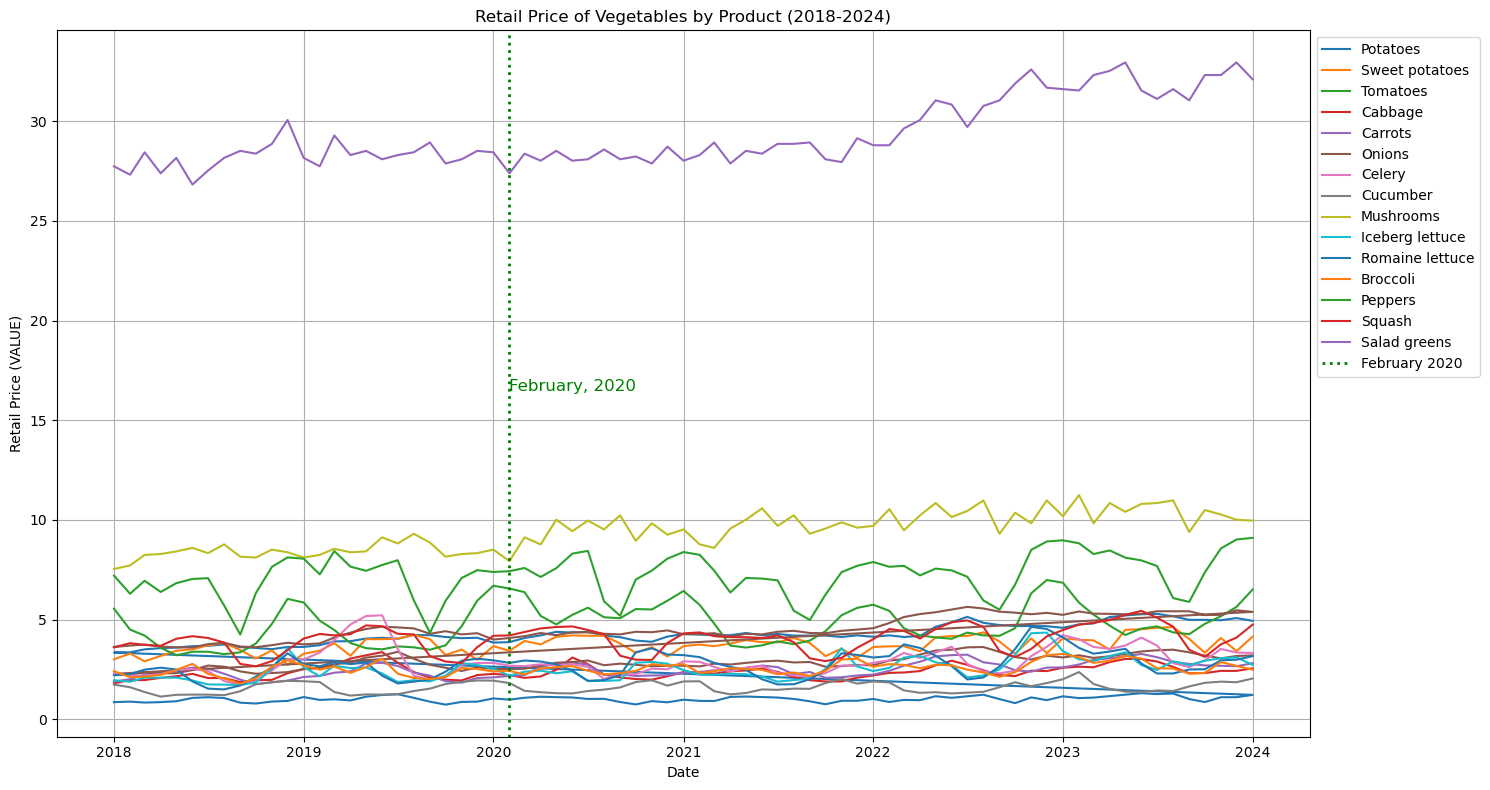

In [69]:
# Ensure REF_DATE is in datetime format
df_retail_food_prices_vegetables['REF_DATE'] = pd.to_datetime(df_retail_food_prices_vegetables['REF_DATE'], format='%Y-%m')

# Filter data between January 2018 and January 2024
df_filtered = df_retail_food_prices_vegetables[
    (df_retail_food_prices_vegetables['REF_DATE'] >= pd.Timestamp('2018-01-01')) & 
    (df_retail_food_prices_vegetables['REF_DATE'] <= pd.Timestamp('2024-01-01'))
]

# Create the plot
plt.figure(figsize=(15, 8))

# Loop through each unique product and plot the corresponding line
for product in df_filtered['Products'].unique():
    product_data = df_filtered[df_filtered['Products'] == product]
    plt.plot(product_data['REF_DATE'], product_data['VALUE'], label=product)

# Add a vertical line at February 2020
feb_2020 = pd.Timestamp('2020-02-01')
plt.axvline(x=feb_2020, color='g', linestyle=':', linewidth=2, label='February 2020')

# Add a label for the vertical line
plt.text(feb_2020, max(df_filtered['VALUE']) * 0.5, 'February, 2020', color='g', fontsize=12, rotation=0)

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Retail Price (VALUE)')
plt.title('Retail Price of Vegetables by Product (2018-2024)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

# Save the plot as an image
plt.savefig('retail_vegetable.png', format='png', dpi=300)

# Show the plot
plt.tight_layout()
plt.show()


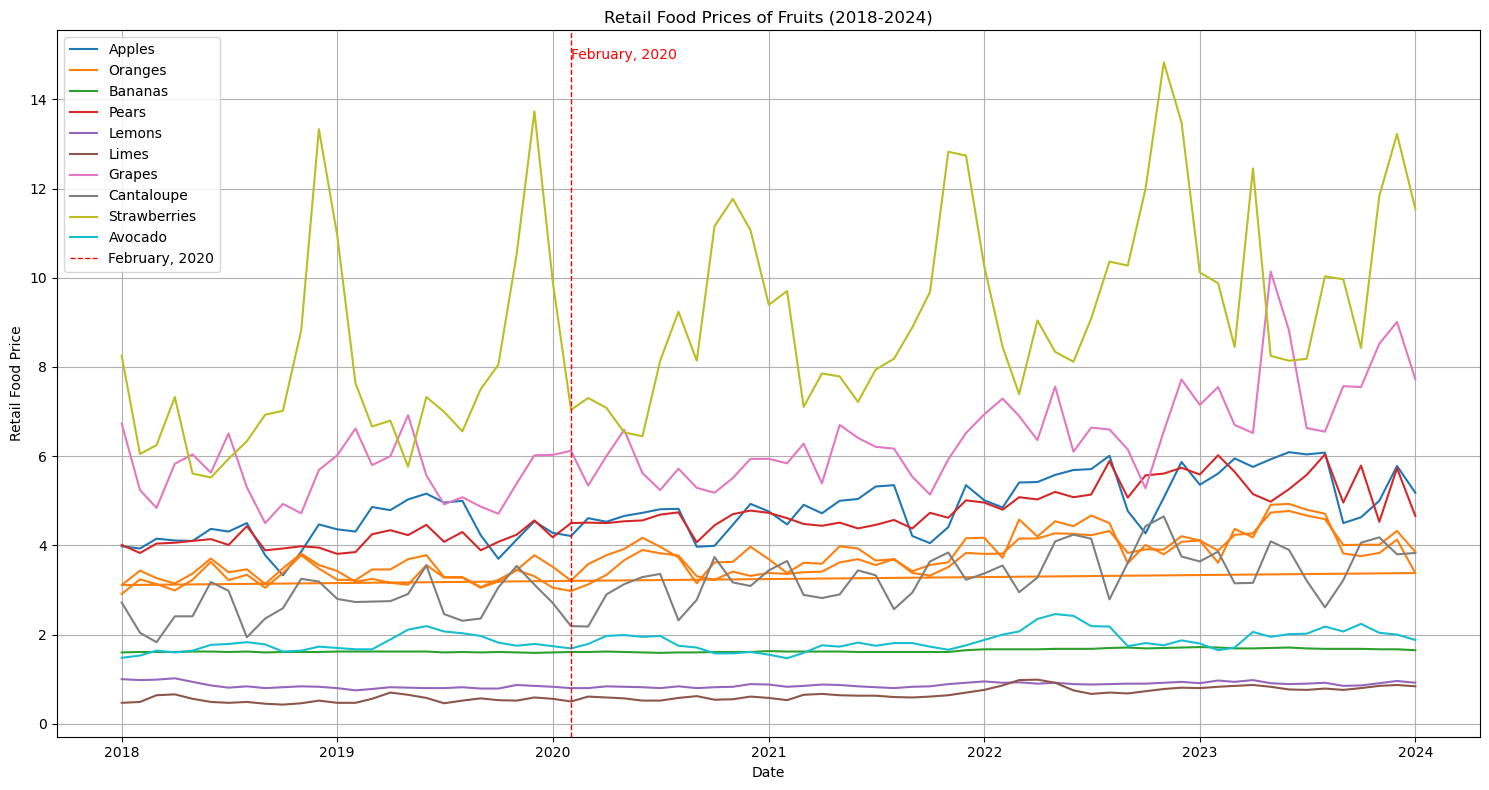

In [51]:
# Ensure REF_DATE is in datetime format
df_retail_food_prices_fruits.loc[:, 'REF_DATE'] = pd.to_datetime(df_retail_food_prices_fruits['REF_DATE'], format='%Y-%m')

# Now filter the data between January 2018 and January 2024
df_filtered = df_retail_food_prices_fruits[
    (df_retail_food_prices_fruits['REF_DATE'] >= pd.Timestamp('2018-01-01')) & 
    (df_retail_food_prices_fruits['REF_DATE'] <= pd.Timestamp('2024-01-01'))
]

# Proceed with your plot
plt.figure(figsize=(15, 8))
for product in df_filtered['Products'].unique():
    product_data = df_filtered[df_filtered['Products'] == product]
    plt.plot(product_data['REF_DATE'], product_data['VALUE'], label=product)

# Add a vertical line at February 2020
feb_2020 = pd.Timestamp('2020-02-01')
plt.axvline(x=feb_2020, color='red', linestyle='--', linewidth=1, label='February, 2020')
plt.text(feb_2020, max(df_filtered['VALUE']), 'February, 2020', color='red', fontsize=10, verticalalignment='bottom')

# Add labels, title, legend
plt.xlabel('Date')
plt.ylabel('Retail Food Price')
plt.title('Retail Food Prices of Fruits (2018-2024)')
plt.legend()
plt.grid(True)

# Save the plot as an image
plt.savefig('retail_Fruits.png', format='png', dpi=300)

# Show plot
plt.tight_layout()
plt.show()


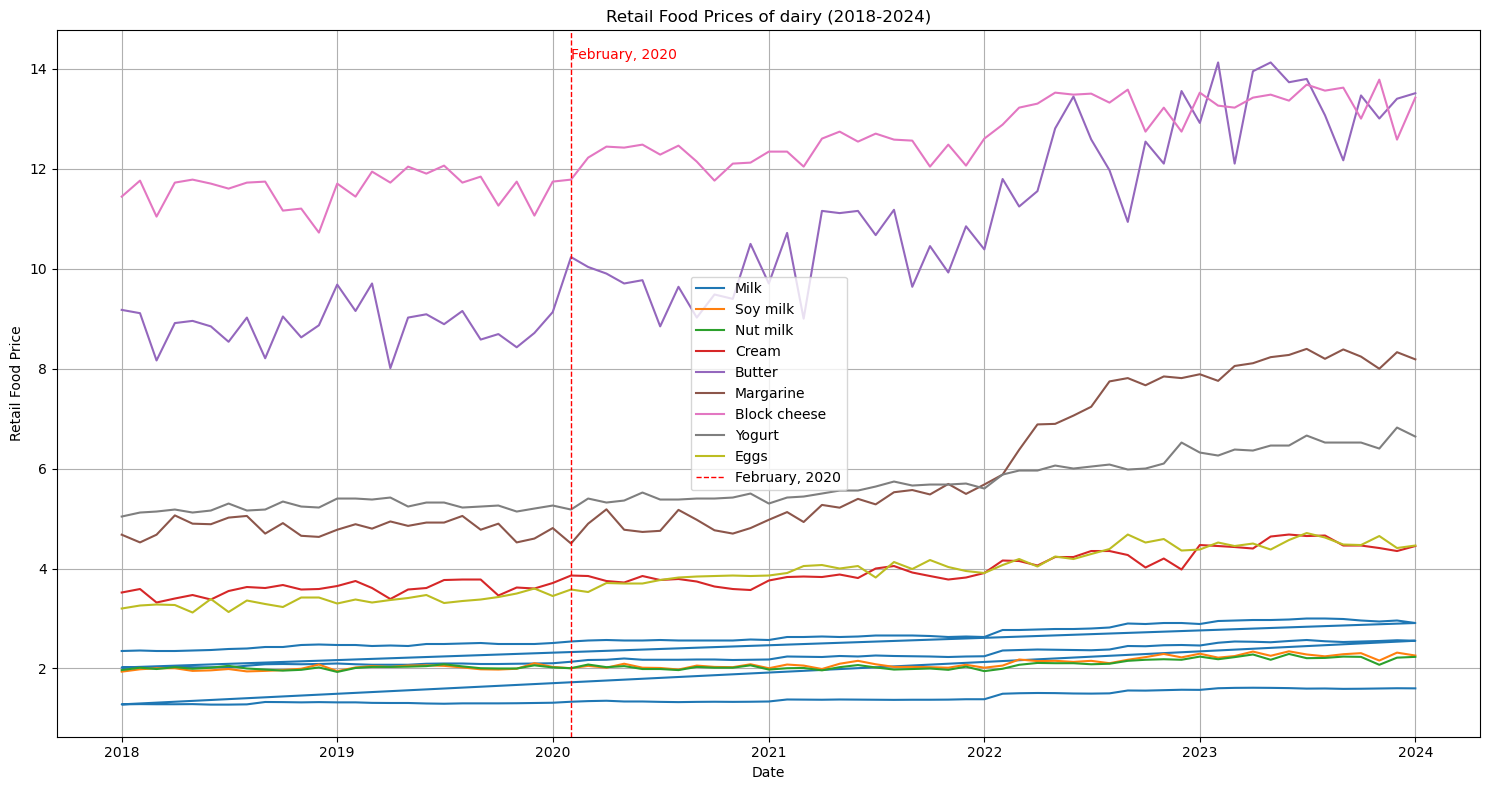

In [53]:
# Ensure REF_DATE is in datetime format
df_retail_food_prices_dairy.loc[:, 'REF_DATE'] = pd.to_datetime(df_retail_food_prices_dairy['REF_DATE'], format='%Y-%m')

# Now filter the data between January 2018 and January 2024
df_filtered = df_retail_food_prices_dairy[
    (df_retail_food_prices_dairy['REF_DATE'] >= pd.Timestamp('2018-01-01')) & 
    (df_retail_food_prices_dairy['REF_DATE'] <= pd.Timestamp('2024-01-01'))
]

# Proceed with your plot
plt.figure(figsize=(15, 8))
for product in df_filtered['Products'].unique():
    product_data = df_filtered[df_filtered['Products'] == product]
    plt.plot(product_data['REF_DATE'], product_data['VALUE'], label=product)

# Add a vertical line at February 2020
feb_2020 = pd.Timestamp('2020-02-01')
plt.axvline(x=feb_2020, color='red', linestyle='--', linewidth=1, label='February, 2020')
plt.text(feb_2020, max(df_filtered['VALUE']), 'February, 2020', color='red', fontsize=10, verticalalignment='bottom')

# Add labels, title, legend
plt.xlabel('Date')
plt.ylabel('Retail Food Price')
plt.title('Retail Food Prices of dairy (2018-2024)')
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


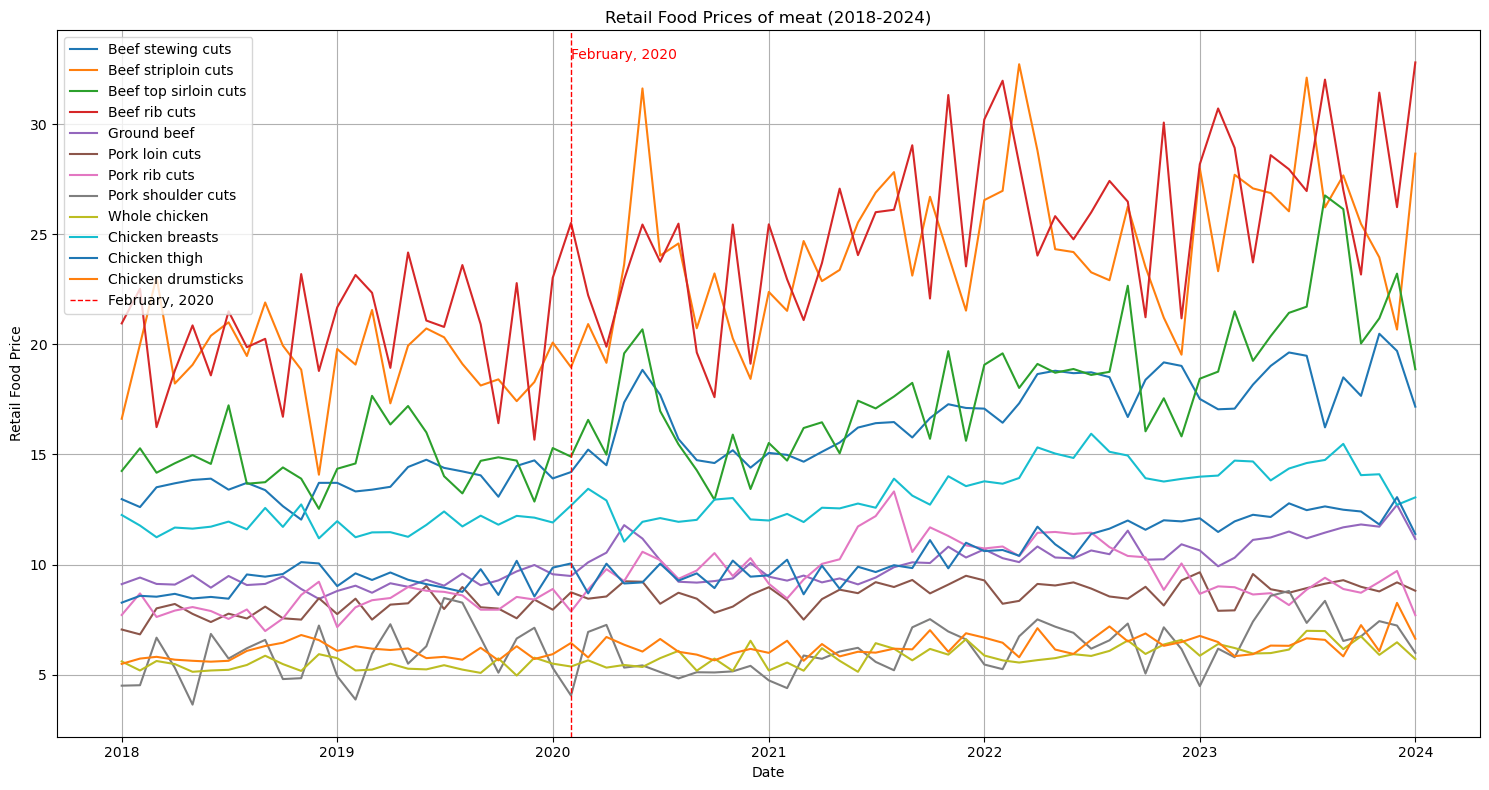

In [682]:
# Ensure REF_DATE is in datetime format
df_retail_food_prices_meat.loc[:, 'REF_DATE'] = pd.to_datetime(df_retail_food_prices_meat['REF_DATE'], format='%Y-%m')

# Now filter the data between January 2018 and January 2024
df_filtered = df_retail_food_prices_meat[
    (df_retail_food_prices_meat['REF_DATE'] >= pd.Timestamp('2018-01-01')) & 
    (df_retail_food_prices_meat['REF_DATE'] <= pd.Timestamp('2024-01-01'))
]

# Proceed with your plot
plt.figure(figsize=(15, 8))
for product in df_filtered['Products'].unique():
    product_data = df_filtered[df_filtered['Products'] == product]
    plt.plot(product_data['REF_DATE'], product_data['VALUE'], label=product)

# Add a vertical line at February 2020
feb_2020 = pd.Timestamp('2020-02-01')
plt.axvline(x=feb_2020, color='red', linestyle='--', linewidth=1, label='February, 2020')
plt.text(feb_2020, max(df_filtered['VALUE']), 'February, 2020', color='red', fontsize=10, verticalalignment='bottom')

# Add labels, title, legend
plt.xlabel('Date')
plt.ylabel('Retail Food Price')
plt.title('Retail Food Prices of meat (2018-2024)')
plt.legend()
plt.grid(True)

# Save the plot as an image
plt.savefig('retail_meat.png', format='png', dpi=300)

# Show plot
plt.tight_layout()
plt.show()


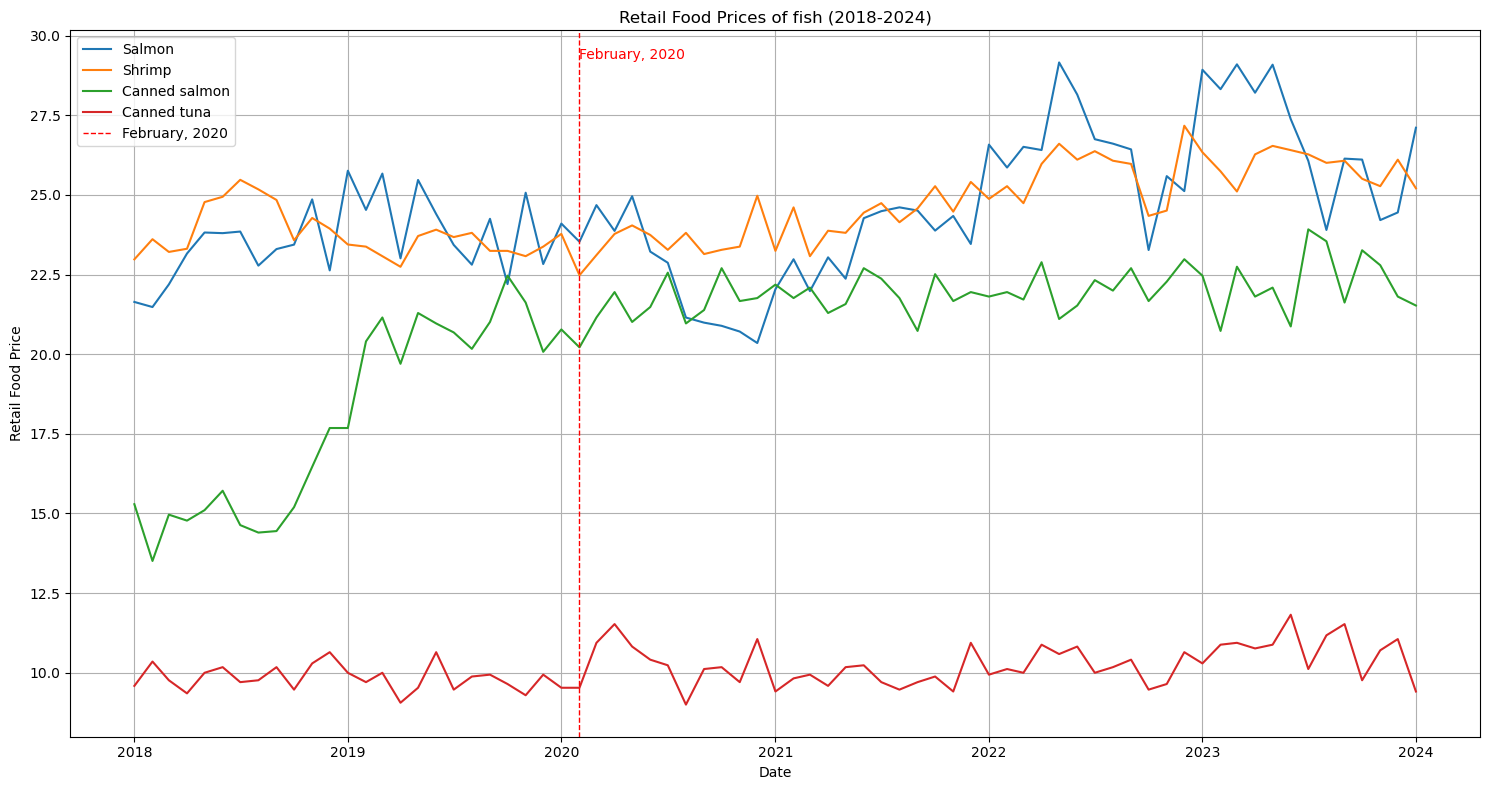

In [55]:
# Ensure REF_DATE is in datetime format
df_retail_food_prices_fish.loc[:, 'REF_DATE'] = pd.to_datetime(df_retail_food_prices_fish['REF_DATE'], format='%Y-%m')

# Now filter the data between January 2018 and January 2024
df_filtered = df_retail_food_prices_fish[
    (df_retail_food_prices_fish['REF_DATE'] >= pd.Timestamp('2018-01-01')) & 
    (df_retail_food_prices_fish['REF_DATE'] <= pd.Timestamp('2024-01-01'))
]

# Proceed with your plot
plt.figure(figsize=(15, 8))
for product in df_filtered['Products'].unique():
    product_data = df_filtered[df_filtered['Products'] == product]
    plt.plot(product_data['REF_DATE'], product_data['VALUE'], label=product)

# Add a vertical line at February 2020
feb_2020 = pd.Timestamp('2020-02-01')
plt.axvline(x=feb_2020, color='red', linestyle='--', linewidth=1, label='February, 2020')
plt.text(feb_2020, max(df_filtered['VALUE']), 'February, 2020', color='red', fontsize=10, verticalalignment='bottom')

# Add labels, title, legend
plt.xlabel('Date')
plt.ylabel('Retail Food Price')
plt.title('Retail Food Prices of fish (2018-2024)')
plt.legend()
plt.grid(True)

# Save the plot as an image
plt.savefig('retail_fish.png', format='png', dpi=300)

# Show plot
plt.tight_layout()
plt.show()


In [35]:
farm_product_prices = pd.read_csv('farmproducts.csv', usecols=["REF_DATE",
                                                                    "GEO",
                                                                    "DGUID",
                                                                    "Farm products",
                                                                    "UOM",
                                                                    "UOM_ID",
                                                                    "SCALAR_FACTOR",
                                                                    "SCALAR_ID",
                                                                    "VECTOR",
                                                                    "COORDINATE",
                                                                    "VALUE",
                                                                    "STATUS",
                                                                    "SYMBOL",
                                                                    "TERMINATED",
                                                                    "DECIMALS"

                                                                    ])
farm_product_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63258 entries, 0 to 63257
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   REF_DATE       63258 non-null  object 
 1   GEO            63258 non-null  object 
 2   DGUID          63258 non-null  object 
 3   Farm products  63258 non-null  object 
 4   UOM            63258 non-null  object 
 5   UOM_ID         63258 non-null  int64  
 6   SCALAR_FACTOR  63258 non-null  object 
 7   SCALAR_ID      63258 non-null  int64  
 8   VECTOR         63258 non-null  object 
 9   COORDINATE     63258 non-null  float64
 10  VALUE          60388 non-null  float64
 11  STATUS         2870 non-null   object 
 12  SYMBOL         0 non-null      float64
 13  TERMINATED     7104 non-null   object 
 14  DECIMALS       63258 non-null  int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 7.2+ MB


In [51]:
df_farm_product_prices= farm_product_prices.drop([
                                                'UOM_ID',
                                                'SCALAR_ID',
                                                'VECTOR',
                                                'COORDINATE',
                                                'STATUS',
                                                'SYMBOL',
                                                'TERMINATED',
                                                'DECIMALS'], axis=1)

df_farm_product_prices.head(3)

,REF_DATE,GEO,DGUID,Farm products,UOM,SCALAR_FACTOR,VALUE
0,2001-01,Newfoundland and Labrador,2016A000210,Fresh potatoes [114211],Dollars per hundredweight,units,17.17
1,2001-02,Newfoundland and Labrador,2016A000210,Fresh potatoes [114211],Dollars per hundredweight,units,17.17
2,2001-03,Newfoundland and Labrador,2016A000210,Fresh potatoes [114211],Dollars per hundredweight,units,NaN


In [75]:
df_farm_product_prices['Farm products'].unique()

array(['Fresh potatoes [114211]', 'Cattle for slaughter [11111111]',
       'Calves for slaughter [111111211]',
       'Cattle for feeding [11111112]', 'Calves for feeding [11111122]',
       'Hogs [111121]', 'Chickens for meat [11113131]',
       'Unprocessed milk from bovine [11612111]',
       'Eggs in shell [116111]', 'Wheat (except durum wheat) [1121111]',
       'Oats [115113111]', 'Barley [1151141]', 'Soybeans [1151211]',
       'Lambs [11114112]', 'Corn for grain [1151111]',
       'Turkeys for meat [111132211]',
       'Canola (including rapeseed) [113111]',
       'Ontario wheat including payments',
       'Ontario wheat excluding payments', 'Rye [1151152]',
       'Canadian Wheat Board, wheat including payments',
       'Canadian Wheat Board, wheat excluding payments',
       'Canadian Wheat Board, durum including payments',
       'Canadian Wheat Board, durum excluding payments',
       'Canadian Wheat Board, barley including payments',
       'Canadian Wheat Board, barley 

In [77]:
df_farm_product_prices['GEO'].unique()

array(['Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia',
       'New Brunswick', 'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan',
       'Alberta', 'British Columbia'], dtype=object)

In [71]:
consumer_price_index = pd.read_csv('consumerpriceindex.csv', usecols=["REF_DATE",
                                                                "GEO",
                                                                "DGUID",
                                                                "Products and product groups",
                                                                "UOM",
                                                                "UOM_ID",
                                                                "SCALAR_FACTOR",
                                                                "SCALAR_ID",
                                                                "VECTOR",
                                                                "COORDINATE",
                                                                "VALUE",
                                                                "STATUS",
                                                                "SYMBOL",
                                                                "TERMINATED",
                                                                "DECIMALS"
                                                                    ])
consumer_price_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91003 entries, 0 to 91002
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REF_DATE                     91003 non-null  object 
 1   GEO                          91003 non-null  object 
 2   DGUID                        91003 non-null  object 
 3   Products and product groups  91003 non-null  object 
 4   UOM                          91003 non-null  object 
 5   UOM_ID                       91003 non-null  int64  
 6   SCALAR_FACTOR                91003 non-null  object 
 7   SCALAR_ID                    91003 non-null  int64  
 8   VECTOR                       91003 non-null  object 
 9   COORDINATE                   91003 non-null  float64
 10  VALUE                        91003 non-null  float64
 11  STATUS                       0 non-null      float64
 12  SYMBOL                       0 non-null      float64
 13  TERMINATED      

In [236]:
consumer_price_index.head(3)

,REF_DATE,GEO,DGUID,Products and product groups,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1995-10,Canada,2016A000011124,All-items,2002=100,17,units,0,v41690973,2.2,87.7,NaN,NaN,NaN,1
1,1995-11,Canada,2016A000011124,All-items,2002=100,17,units,0,v41690973,2.2,88.0,NaN,NaN,NaN,1
2,1995-12,Canada,2016A000011124,All-items,2002=100,17,units,0,v41690973,2.2,87.8,NaN,NaN,NaN,1


In [73]:
df_consumer_price_index= consumer_price_index.drop([
                                                'UOM',
                                                'UOM_ID',
                                                'SCALAR_ID',
                                                'VECTOR',
                                                'COORDINATE',
                                                'STATUS',
                                                'SYMBOL',
                                                'TERMINATED',
                                                'DECIMALS'], axis=1)

df_consumer_price_index.head(3)

,REF_DATE,GEO,DGUID,Products and product groups,SCALAR_FACTOR,VALUE
0,1995-10,Canada,2016A000011124,All-items,units,87.7
1,1995-11,Canada,2016A000011124,All-items,units,88.0
2,1995-12,Canada,2016A000011124,All-items,units,87.8


In [300]:
df_consumer_price_index['Products and product groups'].unique()

array(['All-items', 'Food', 'Meat',
       'Fish, seafood and other marine products',
       'Dairy products and eggs',
       'Bakery and cereal products (excluding baby food)',
       'Fruit, fruit preparations and nuts',
       'Vegetables and vegetable preparations',
       'Other food products and non-alcoholic beverages', 'Shelter',
       'Household operations, furnishings and equipment',
       'Clothing and footwear', 'Transportation', 'Gasoline',
       'Health and personal care', 'Recreation, education and reading',
       'Alcoholic beverages, tobacco products and recreational cannabis',
       'Energy', 'Goods', 'Services'], dtype=object)

In [71]:
df_consumer_price_index['GEO'].unique()

array(['Canada', 'Newfoundland and Labrador', 'Prince Edward Island',
       'Nova Scotia', 'New Brunswick', 'Quebec', 'Ontario', 'Manitoba',
       'Saskatchewan', 'Alberta', 'British Columbia', 'Whitehorse, Yukon',
       'Yellowknife, Northwest Territories', 'Iqaluit, Nunavut'],
      dtype=object)

In [75]:
# drop rows with non-food items
df_consumer_price_index_food= df_consumer_price_index[(df_consumer_price_index['Products and product groups'] != 'Shelter') 
                                                    & (df_consumer_price_index['Products and product groups'] != 'Household operations, furnishings and equipment')
                                                    & (df_consumer_price_index['Products and product groups'] != 'Clothing and footwear')
                                                    & (df_consumer_price_index['Products and product groups'] != 'Transportation')
                                                    & (df_consumer_price_index['Products and product groups'] != 'Gasoline')
                                                    & (df_consumer_price_index['Products and product groups'] != 'Health and personal care')
                                                    & (df_consumer_price_index['Products and product groups'] != 'Recreation, education and reading')
                                                    & (df_consumer_price_index['Products and product groups'] != 'Alcoholic beverages, tobacco products and recreational cannabis')
                                                    & (df_consumer_price_index['Products and product groups'] != 'Energy')
                                                    & (df_consumer_price_index['Products and product groups'] != 'Goods')
                                                    & (df_consumer_price_index['Products and product groups'] != 'Services')]
                                                

In [77]:
df_consumer_price_index_food['Products and product groups'].unique()

array(['All-items', 'Food', 'Meat',
       'Fish, seafood and other marine products',
       'Dairy products and eggs',
       'Bakery and cereal products (excluding baby food)',
       'Fruit, fruit preparations and nuts',
       'Vegetables and vegetable preparations',
       'Other food products and non-alcoholic beverages'], dtype=object)

In [184]:
df_consumer_price_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91003 entries, 0 to 91002
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REF_DATE                     91003 non-null  object 
 1   GEO                          91003 non-null  object 
 2   DGUID                        91003 non-null  object 
 3   Products and product groups  91003 non-null  object 
 4   SCALAR_FACTOR                91003 non-null  object 
 5   VALUE                        91003 non-null  float64
dtypes: float64(1), object(5)
memory usage: 4.2+ MB


In [79]:
# Filter for Food in Canada
df_consumer_price_index_filtered = df_consumer_price_index[(df_consumer_price_index['GEO'] == 'Canada') 
                                                    & (df_consumer_price_index['Products and product groups'] == 'Food')]

In [81]:
df_consumer_price_index_filtered = df_consumer_price_index_filtered.sort_values(by='REF_DATE')

In [208]:
df_consumer_price_index_filtered.head(5)

,REF_DATE,GEO,DGUID,Products and product groups,SCALAR_FACTOR,VALUE
349,1995-10,Canada,2016A000011124,Food,units,86.4
350,1995-11,Canada,2016A000011124,Food,units,86.4
351,1995-12,Canada,2016A000011124,Food,units,86.8
352,1996-01,Canada,2016A000011124,Food,units,87.2
353,1996-02,Canada,2016A000011124,Food,units,87.3


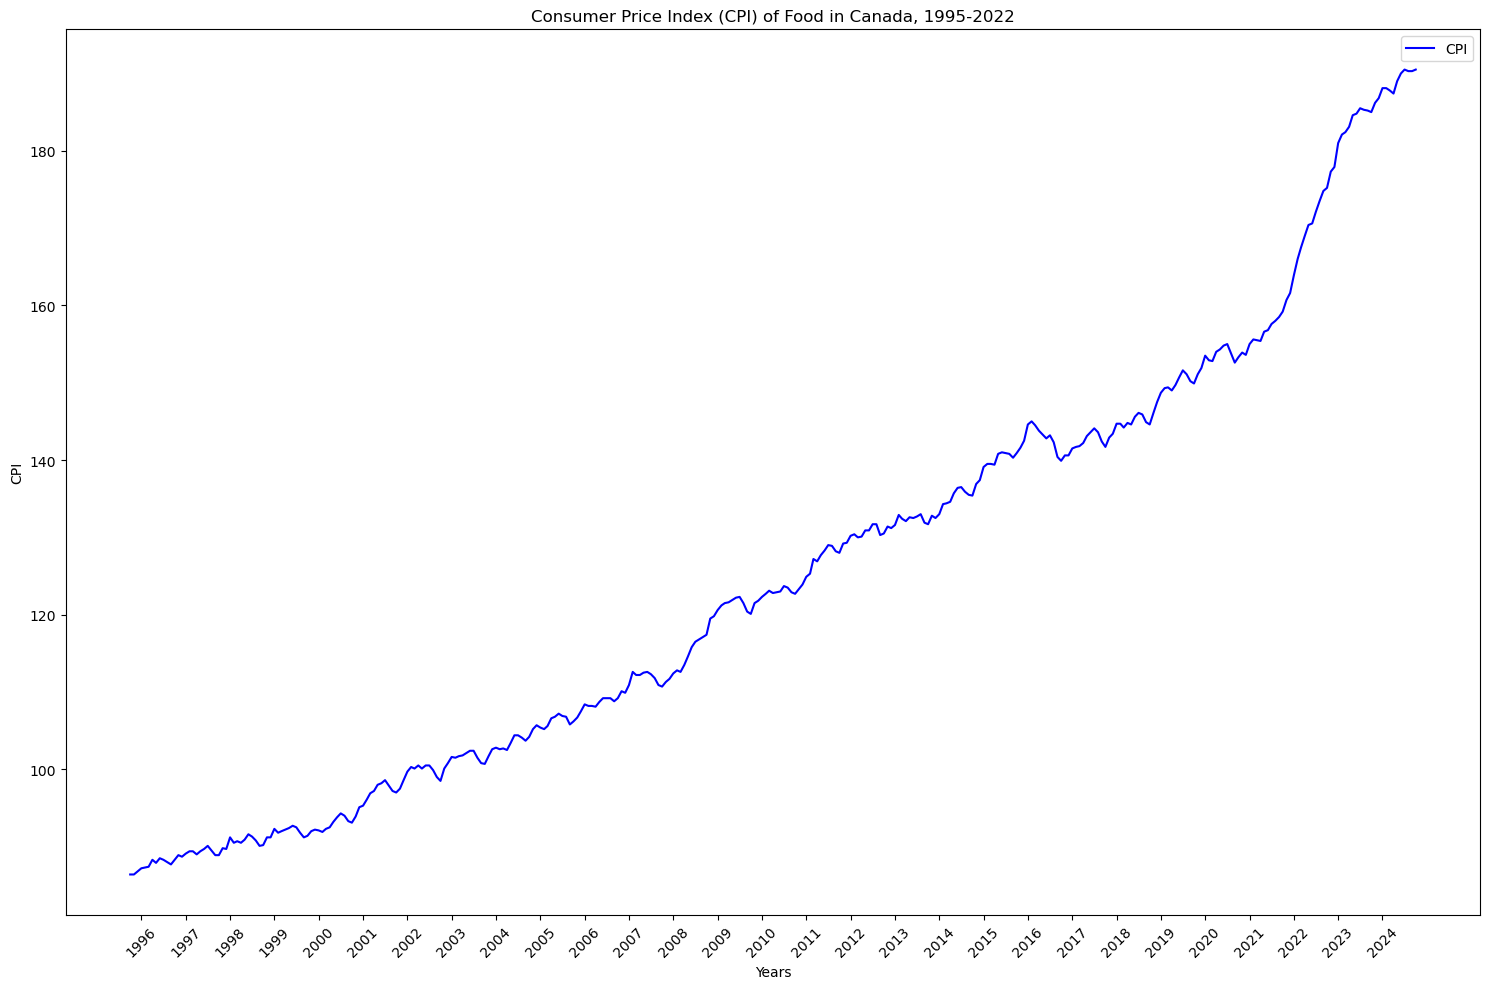

In [83]:
# COnvert Dates in datetime format
df_consumer_price_index_filtered['REF_DATE'] = pd.to_datetime(df_consumer_price_index_filtered['REF_DATE'], format='%Y-%m')

# Plotting
plt.figure(figsize=(15, 10))
plt.plot(df_consumer_price_index_filtered['REF_DATE'], df_consumer_price_index_filtered['VALUE'], linestyle='-', color='b', label='CPI')

# Customize x-axis
# Filter out only January dates for tick labels
january_dates = df_consumer_price_index_filtered[df_consumer_price_index_filtered['REF_DATE'].dt.month == 1]['REF_DATE']
january_labels = df_consumer_price_index_filtered[df_consumer_price_index_filtered['REF_DATE'].dt.month == 1]['REF_DATE'].dt.year

plt.xticks(ticks=january_dates, labels=january_labels, rotation=45)

# Add labels, title, legend, and grid
plt.xlabel('Years')
plt.ylabel('CPI')
plt.title('Consumer Price Index (CPI) of Food in Canada, 1995-2022')
plt.legend()
plt.grid(False)

plt.tight_layout()
plt.show()


In [85]:
# Filter for allItems-items in Canada
df_consumer_price_index_allItems = df_consumer_price_index[(df_consumer_price_index['GEO'] == 'Canada') 
                                                    & (df_consumer_price_index['Products and product groups'] == 'All-items')]
													
df_consumer_price_index_allItems = df_consumer_price_index_allItems.sort_values(by='REF_DATE')


In [304]:
df_consumer_price_index_allItems.head(3)

,REF_DATE,GEO,DGUID,Products and product groups,SCALAR_FACTOR,VALUE
0,1995-10,Canada,2016A000011124,All-items,units,87.7
1,1995-11,Canada,2016A000011124,All-items,units,88.0
2,1995-12,Canada,2016A000011124,All-items,units,87.8


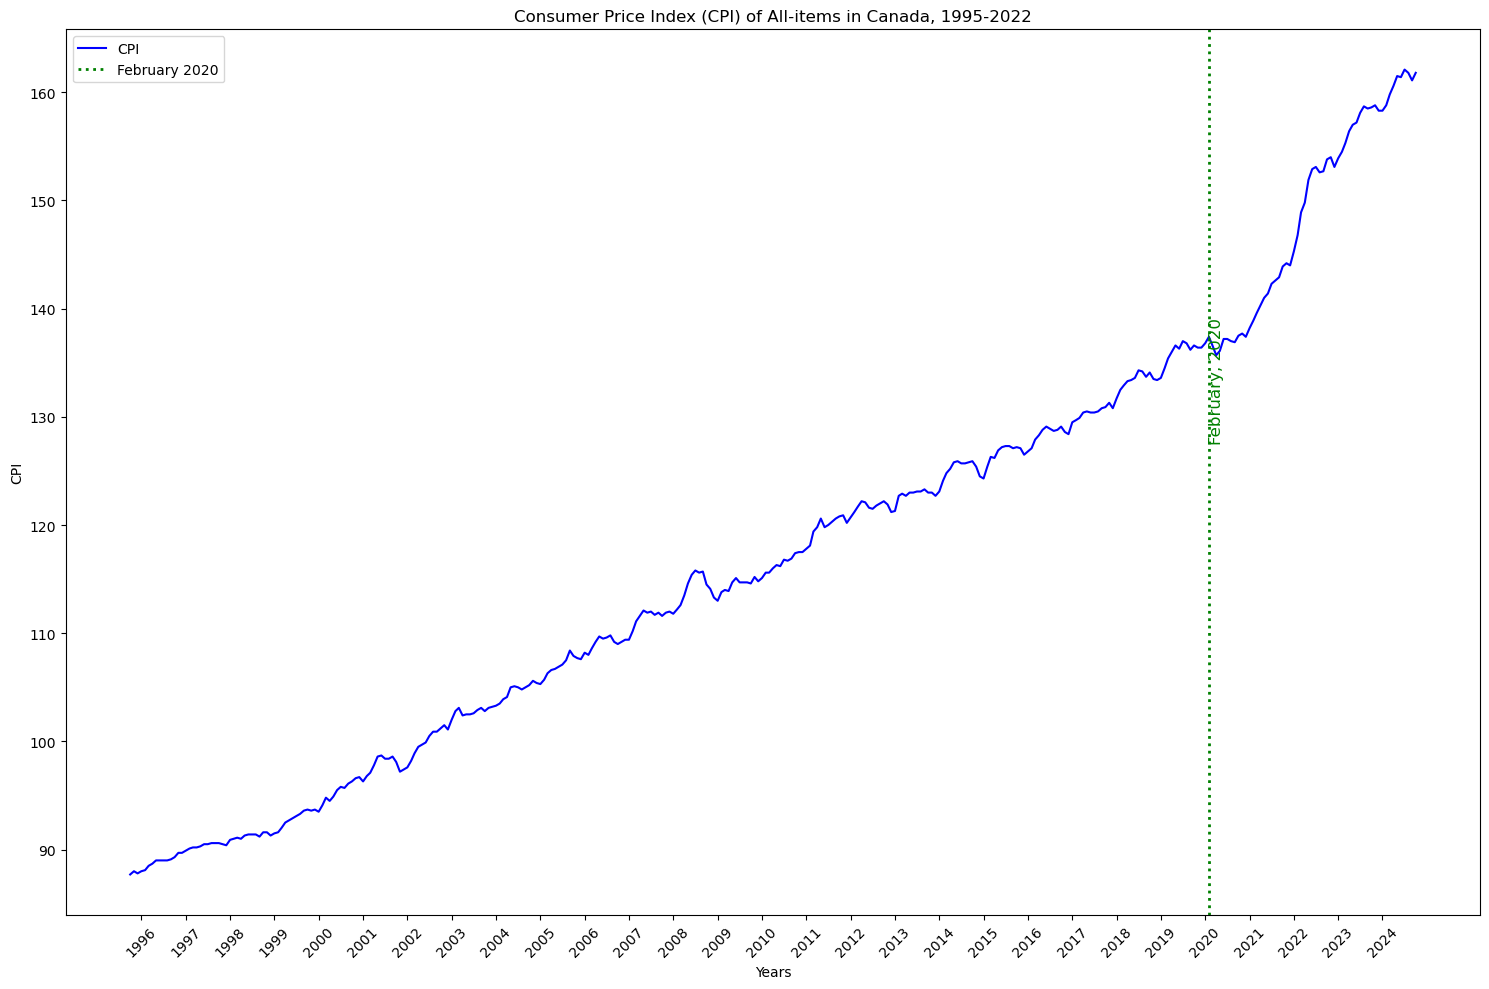

In [89]:
# COnvert Dates in datetime format
df_consumer_price_index_allItems['REF_DATE'] = pd.to_datetime(df_consumer_price_index_allItems['REF_DATE'], format='%Y-%m')

# Plotting
plt.figure(figsize=(15, 10))
plt.plot(df_consumer_price_index_allItems['REF_DATE'], df_consumer_price_index_allItems['VALUE'], linestyle='-', color='b', label='CPI')

# Add a vertical line at February 2020
feb_2020 = pd.to_datetime('2020-02-01')  # Date for February 2020
plt.axvline(x=feb_2020, color='g', linestyle=':', linewidth=2, label='February 2020')

# Add a label for the vertical line
plt.text(
    feb_2020, 
    max(df_consumer_price_index_filtered['VALUE'].max(), df_consumer_price_index_allItems['VALUE'].max()) * 0.7, 
    'February, 2020', 
    color='g', 
    fontsize=12, 
    rotation=90, 
    verticalalignment='center'
)

# Customize x-axis
# Filter out only January dates for tick labels
january_dates = df_consumer_price_index_allItems[df_consumer_price_index_allItems['REF_DATE'].dt.month == 1]['REF_DATE']
january_labels = df_consumer_price_index_allItems[df_consumer_price_index_allItems['REF_DATE'].dt.month == 1]['REF_DATE'].dt.year

plt.xticks(ticks=january_dates, labels=january_labels, rotation=45)

# Add labels, title, legend, and grid
plt.xlabel('Years')
plt.ylabel('CPI')
plt.title('Consumer Price Index (CPI) of All-items in Canada, 1995-2022')
plt.legend()
plt.grid(False)

plt.tight_layout()
plt.show()


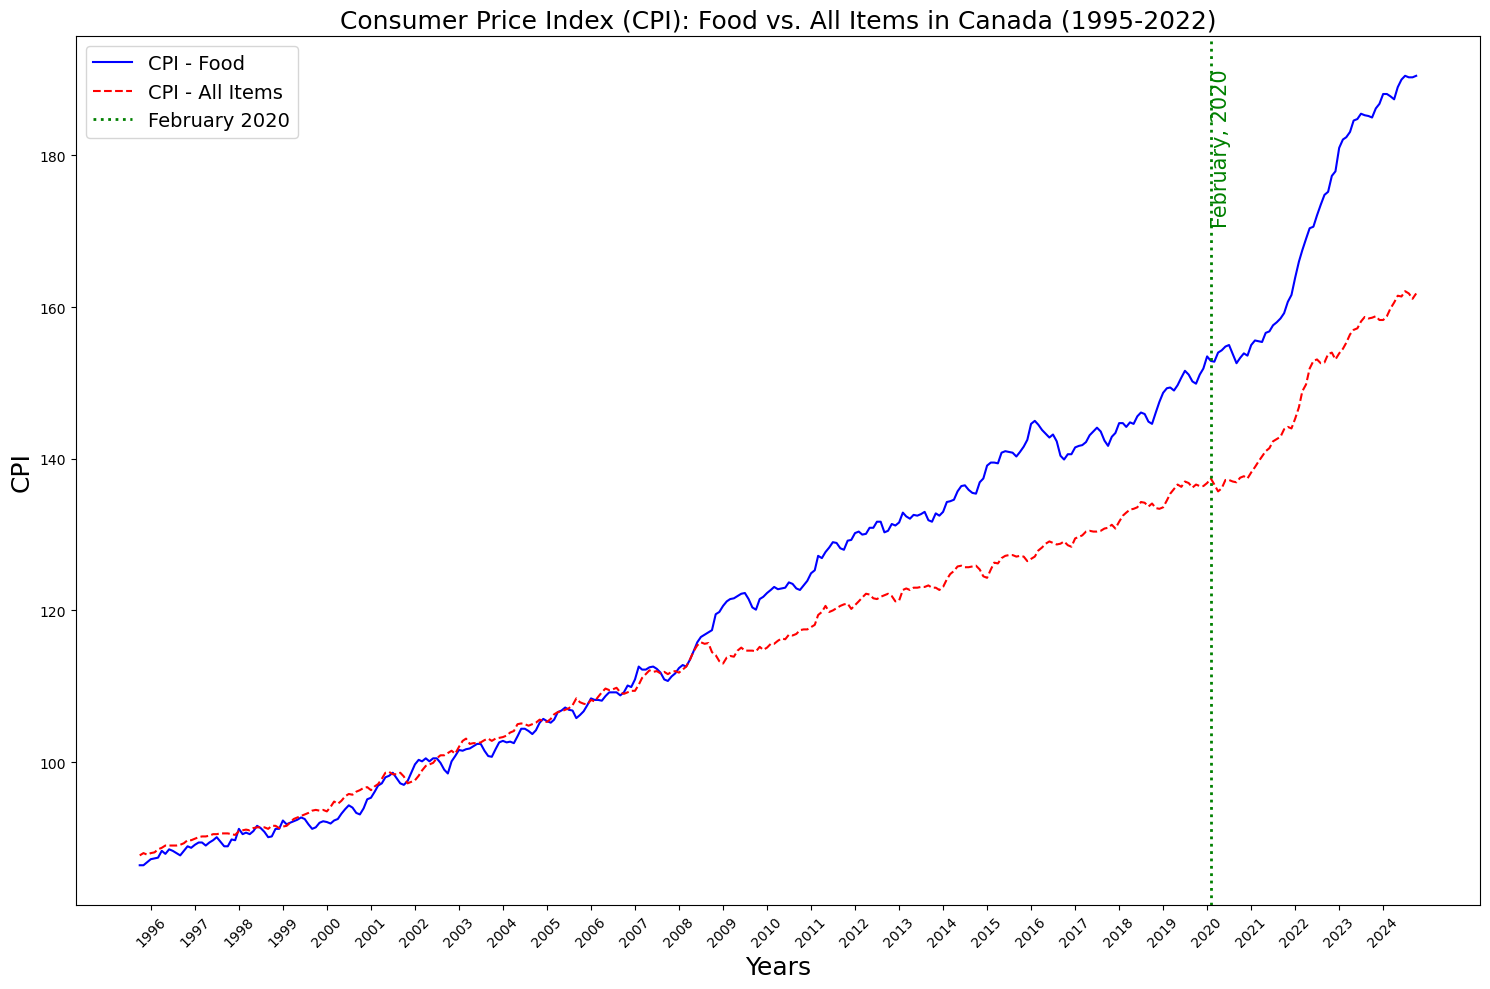

In [95]:
# Ensure REF_DATE is in datetime format
df_consumer_price_index_filtered['REF_DATE'] = pd.to_datetime(df_consumer_price_index_filtered['REF_DATE'], format='%Y-%m')
df_consumer_price_index_allItems['REF_DATE'] = pd.to_datetime(df_consumer_price_index_allItems['REF_DATE'], format='%Y-%m')

# Create the figure
plt.figure(figsize=(15, 10))

# Plot the first dataset
plt.plot(
    df_consumer_price_index_filtered['REF_DATE'],
    df_consumer_price_index_filtered['VALUE'],
    linestyle='-',
    color='b',
    label='CPI - Food'
)

# Plot the second dataset
plt.plot(
    df_consumer_price_index_allItems['REF_DATE'],
    df_consumer_price_index_allItems['VALUE'],
    linestyle='--',
    color='r',
    label='CPI - All Items'
)

# Add a vertical line at February 2020
feb_2020 = pd.to_datetime('2020-02-01')  # Date for February 2020
plt.axvline(x=feb_2020, color='g', linestyle=':', linewidth=2, label='February 2020')

# Add a label for the vertical line
plt.text(
    feb_2020, 
    max(df_consumer_price_index_filtered['VALUE'].max(), df_consumer_price_index_allItems['VALUE'].max()) * 0.95, 
    'February, 2020', 
    color='g', 
    fontsize=15, 
    rotation=90, 
    verticalalignment='center'
)

# Customize the x-axis to show only January dates
january_dates = df_consumer_price_index_filtered[
    df_consumer_price_index_filtered['REF_DATE'].dt.month == 1
]['REF_DATE']
january_labels = df_consumer_price_index_filtered[
    df_consumer_price_index_filtered['REF_DATE'].dt.month == 1
]['REF_DATE'].dt.year

plt.xticks(ticks=january_dates, labels=january_labels, rotation=45)

# Add labels, title, legend, and grid
plt.xlabel('Years', fontsize=18)
plt.ylabel('CPI', fontsize=18)
plt.title('Consumer Price Index (CPI): Food vs. All Items in Canada (1995-2022)', fontsize=18)
plt.legend(loc='upper left', fontsize=14)
plt.grid(False)

# Save the plot as an image
plt.savefig('CPI_FoodvsCanada.png', format='png', dpi=300)

plt.tight_layout()
plt.show()


In [99]:
# Filter for Food in every province
df_consumer_price_index_allprov = df_consumer_price_index[(df_consumer_price_index['GEO'] != 'Canada') 
                                                    & (df_consumer_price_index['Products and product groups'] == 'Food')]

C:\Users\anany\AppData\Local\Temp\ipykernel_25284\941091003.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_consumer_price_index_allprov['REF_DATE'] = pd.to_datetime(df_consumer_price_index_allprov['REF_DATE'], format='%Y-%m')


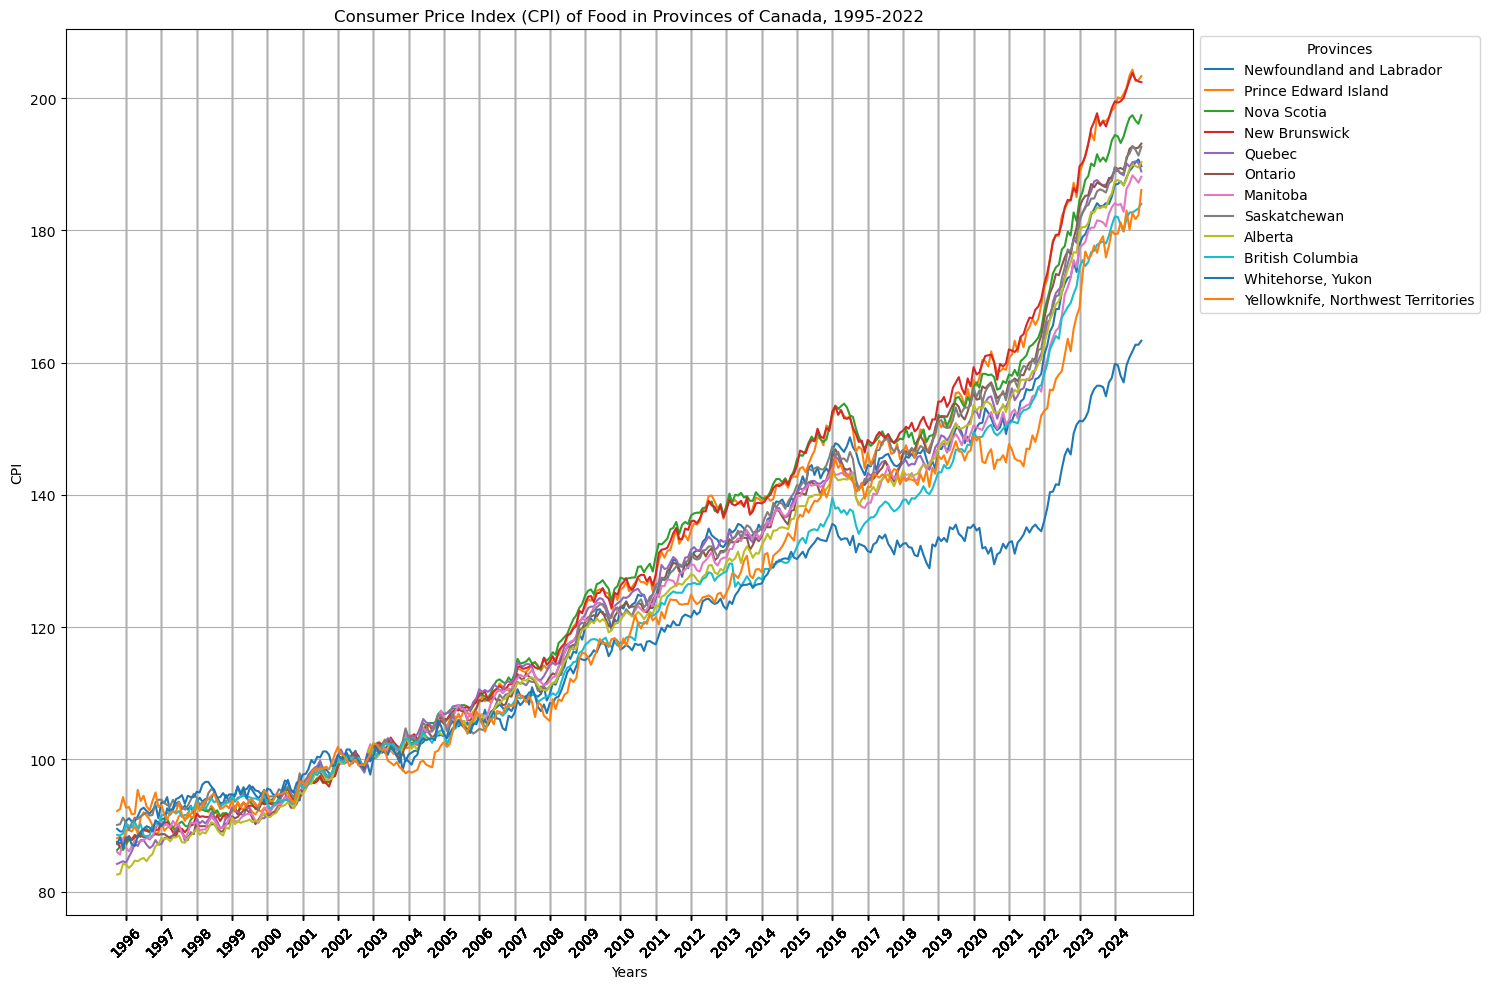

In [103]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert dates to datetime format
df_consumer_price_index_allprov['REF_DATE'] = pd.to_datetime(df_consumer_price_index_allprov['REF_DATE'], format='%Y-%m')

# Group by 'GEO' to handle data for each province separately
provinces = df_consumer_price_index_allprov['GEO'].unique()  # Get unique province names

# Create the plot
plt.figure(figsize=(15, 10))

# Iterate through each province and plot its CPI data
for province in provinces:
    province_data = df_consumer_price_index_allprov[df_consumer_price_index_allprov['GEO'] == province]
    plt.plot(province_data['REF_DATE'], province_data['VALUE'], label=province)

# Customize x-axis
# Filter out only January dates for tick labels
january_dates = df_consumer_price_index_allprov[df_consumer_price_index_allprov['REF_DATE'].dt.month == 1]['REF_DATE']
january_labels = df_consumer_price_index_allprov[df_consumer_price_index_allprov['REF_DATE'].dt.month == 1]['REF_DATE'].dt.year

plt.xticks(ticks=january_dates, labels=january_labels, rotation=45)

# Add labels, title, legend, and grid
plt.xlabel('Years')
plt.ylabel('CPI')
plt.title('Consumer Price Index (CPI) of Food in Provinces of Canada, 1995-2022')
plt.legend(title='Provinces', loc='upper left', bbox_to_anchor=(1, 1))  # Position the legend outside the plot
plt.grid(True)

# Save the plot as an image
plt.savefig('CPI_FoodvAllProv.png', format='png', dpi=300)

plt.tight_layout()
plt.show()


In [105]:
df_consumer_price_index.sort_values(by= "REF_DATE")

,REF_DATE,GEO,DGUID,Products and product groups,SCALAR_FACTOR,VALUE
0,1995-10,Canada,2016A000011124,All-items,units,87.7
53397,1995-10,Manitoba,2016A000246,Gasoline,units,84.4
3839,1995-10,Canada,2016A000011124,Clothing and footwear,units,97.2
53746,1995-10,Manitoba,2016A000246,Health and personal care,units,86.8
22336,1995-10,Nova Scotia,2016A000212,Dairy products and eggs,units,86.8
...,...,...,...,...,...,...
15006,2024-10,Prince Edward Island,2016A000211,Meat,units,229.1
66309,2024-10,Alberta,2016A000248,Shelter,units,222.3
14657,2024-10,Prince Edward Island,2016A000211,Food,units,203.3
64913,2024-10,Alberta,2016A000248,Bakery and cereal products (excluding baby food),units,196.4


In [250]:
df_consumer_price_index_filtered.head(30)                            

,REF_DATE,GEO,DGUID,Products and product groups,SCALAR_FACTOR,VALUE
349,1995-10-01,Canada,2016A000011124,Food,units,86.4
350,1995-11-01,Canada,2016A000011124,Food,units,86.4
351,1995-12-01,Canada,2016A000011124,Food,units,86.8
352,1996-01-01,Canada,2016A000011124,Food,units,87.2
353,1996-02-01,Canada,2016A000011124,Food,units,87.3
...,...,...,...,...,...,...
374,1997-11-01,Canada,2016A000011124,Food,units,89.8
375,1997-12-01,Canada,2016A000011124,Food,units,89.7
376,1998-01-01,Canada,2016A000011124,Food,units,91.2
377,1998-02-01,Canada,2016A000011124,Food,units,90.5


In [107]:
df_consumer_price_index_filtered = df_consumer_price_index_filtered.sort_values('REF_DATE')

In [109]:
# Adding a new column "%CPI" to the dataframe
# Calculating the percentage change of CPI in Canada
df_consumer_price_index_filtered['%CPI'] = (
    (df_consumer_price_index_filtered['VALUE'] - df_consumer_price_index_filtered['VALUE'].shift(12)) 
    * 100 / df_consumer_price_index_filtered['VALUE'].shift(12)
)

# Display the updated dataframe
df_consumer_price_index_filtered.head(20)


,REF_DATE,GEO,DGUID,Products and product groups,SCALAR_FACTOR,VALUE,%CPI
349,1995-10-01,Canada,2016A000011124,Food,units,86.4,NaN
350,1995-11-01,Canada,2016A000011124,Food,units,86.4,NaN
351,1995-12-01,Canada,2016A000011124,Food,units,86.8,NaN
352,1996-01-01,Canada,2016A000011124,Food,units,87.2,NaN
353,1996-02-01,Canada,2016A000011124,Food,units,87.3,NaN
354,1996-03-01,Canada,2016A000011124,Food,units,87.4,NaN
355,1996-04-01,Canada,2016A000011124,Food,units,88.3,NaN
356,1996-05-01,Canada,2016A000011124,Food,units,87.9,NaN
357,1996-06-01,Canada,2016A000011124,Food,units,88.5,NaN
358,1996-07-01,Canada,2016A000011124,Food,units,88.3,NaN


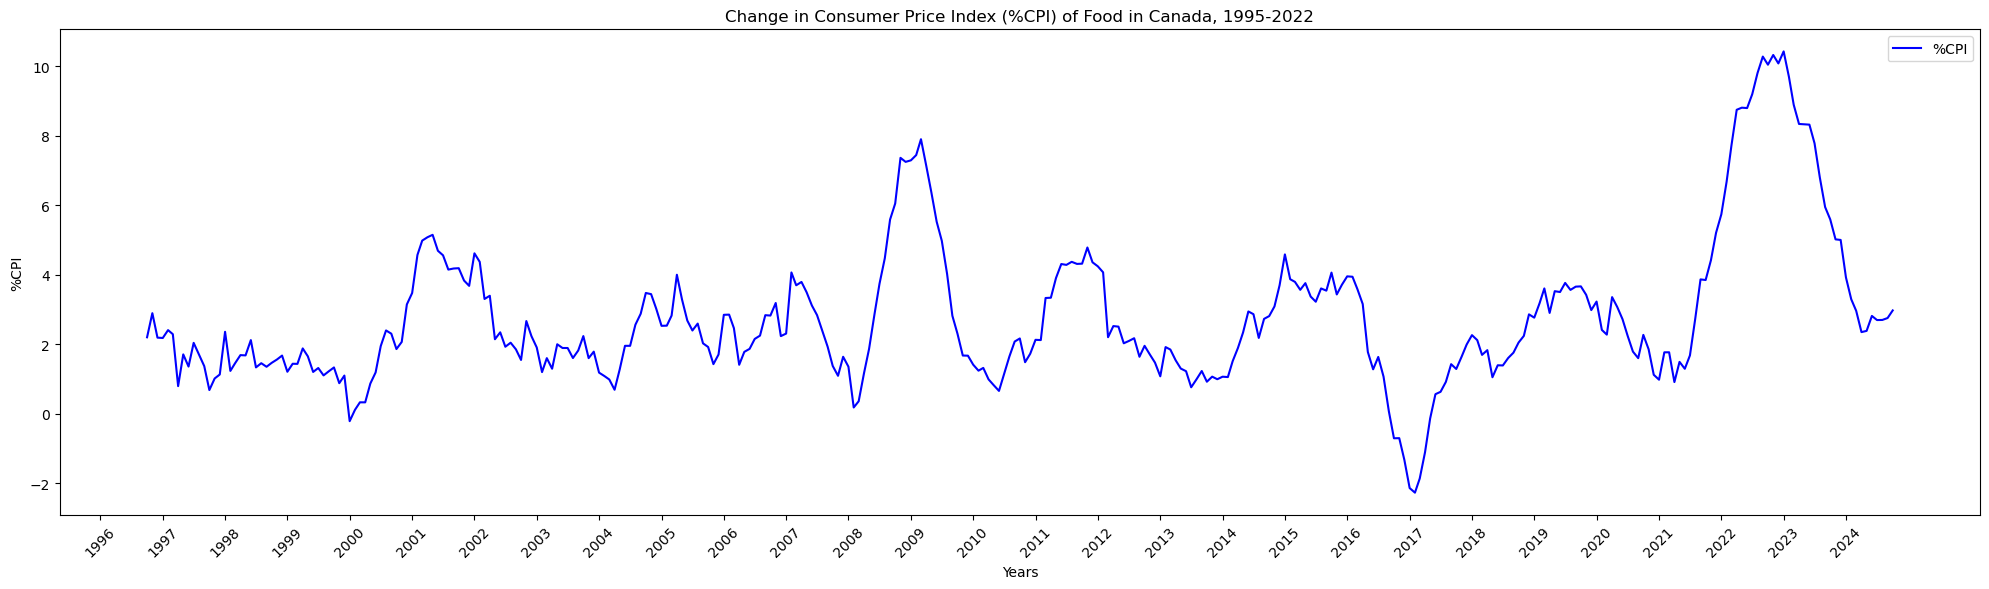

In [111]:
# Plotting
plt.figure(figsize=(20, 6))
plt.plot(df_consumer_price_index_filtered['REF_DATE'], df_consumer_price_index_filtered['%CPI'], linestyle='-', color='b', label='%CPI')

# Customize x-axis
# Filter out only January dates for tick labels
january_dates = df_consumer_price_index_filtered[df_consumer_price_index_filtered['REF_DATE'].dt.month == 1]['REF_DATE']
january_labels = df_consumer_price_index_filtered[df_consumer_price_index_filtered['REF_DATE'].dt.month == 1]['REF_DATE'].dt.year

plt.xticks(ticks=january_dates, labels=january_labels, rotation=45)

# Add labels, title, legend, and grid
plt.xlabel('Years')
plt.ylabel('%CPI')
plt.title('Change in Consumer Price Index (%CPI) of Food in Canada, 1995-2022')
plt.legend()
plt.grid(False)

plt.tight_layout()
plt.show()

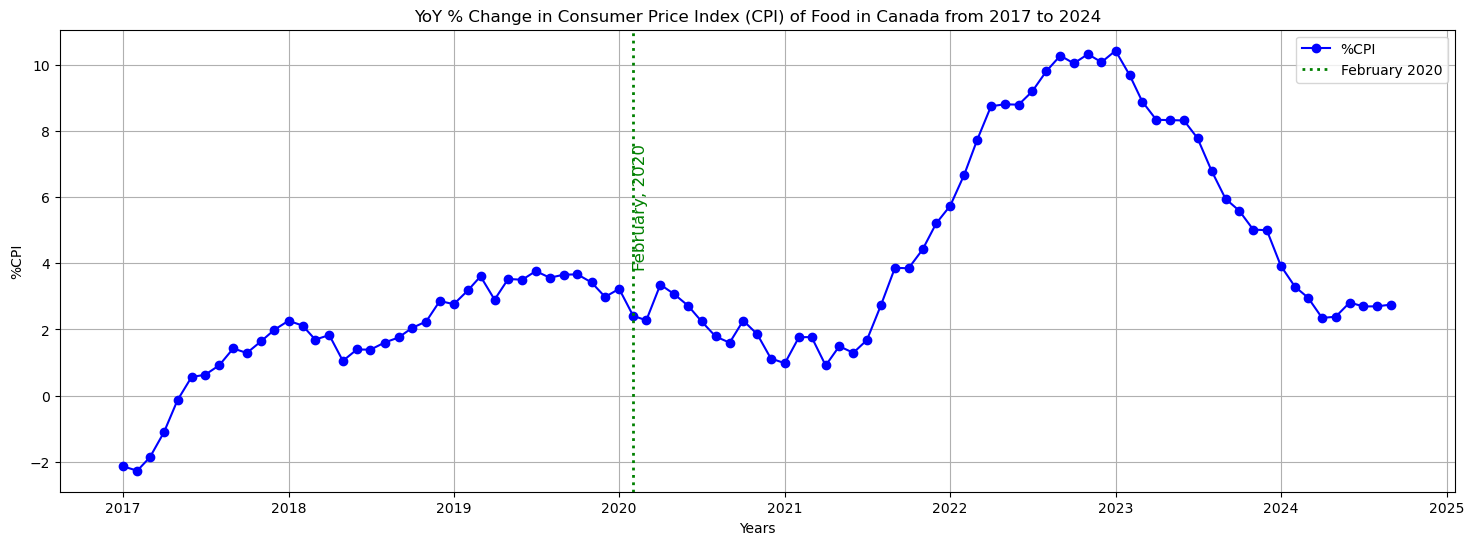

In [113]:
# Filter the dataframe between 2017 and 2024
filtered_df = df_consumer_price_index_filtered[
    (df_consumer_price_index_filtered['REF_DATE'] >= '2017-01-01') &
    (df_consumer_price_index_filtered['REF_DATE'] <= '2024-09-01')
]

# Plot the filtered data
plt.figure(figsize=(18, 6))
plt.plot(filtered_df['REF_DATE'], filtered_df['%CPI'], linestyle='-', marker='o', color='b', label='%CPI')

# Add a vertical line at February 2020
feb_2020 = pd.to_datetime('2020-02-01')  # Date for February 2020
plt.axvline(x=feb_2020, color='g', linestyle=':', linewidth=2, label='February 2020')

# Add a label for the vertical line
plt.text(
    feb_2020, 
    max(df_consumer_price_index_filtered['VALUE'].max(), df_consumer_price_index_allItems['VALUE'].max()) * 0.03, 
    'February, 2020', 
    color='g', 
    fontsize=12, 
    rotation=90, 
    verticalalignment='center'
)

# Add labels and title
plt.xlabel('Years')
plt.ylabel('%CPI')
plt.title('YoY % Change in Consumer Price Index (CPI) of Food in Canada from 2017 to 2024')
plt.grid(True)
plt.legend()

plt.show()


In [115]:
df_consumer_price_index_allItems = df_consumer_price_index_allItems.sort_values('REF_DATE')

In [117]:
# Adding a new column "%CPI" to the dataframe
# Calculating the percentage change of CPI in Canada
df_consumer_price_index_allItems['%CPI'] = (
    (df_consumer_price_index_allItems['VALUE'] - df_consumer_price_index_allItems['VALUE'].shift(12)) 
    * 100 / df_consumer_price_index_allItems['VALUE'].shift(12)
)

In [316]:
# Display the updated dataframe
df_consumer_price_index_allItems.head(20)

,REF_DATE,GEO,DGUID,Products and product groups,SCALAR_FACTOR,VALUE,%CPI
0,1995-10-01,Canada,2016A000011124,All-items,units,87.7,NaN
1,1995-11-01,Canada,2016A000011124,All-items,units,88.0,NaN
2,1995-12-01,Canada,2016A000011124,All-items,units,87.8,NaN
3,1996-01-01,Canada,2016A000011124,All-items,units,88.0,NaN
4,1996-02-01,Canada,2016A000011124,All-items,units,88.1,NaN
5,1996-03-01,Canada,2016A000011124,All-items,units,88.5,NaN
6,1996-04-01,Canada,2016A000011124,All-items,units,88.7,NaN
7,1996-05-01,Canada,2016A000011124,All-items,units,89.0,NaN
8,1996-06-01,Canada,2016A000011124,All-items,units,89.0,NaN
9,1996-07-01,Canada,2016A000011124,All-items,units,89.0,NaN


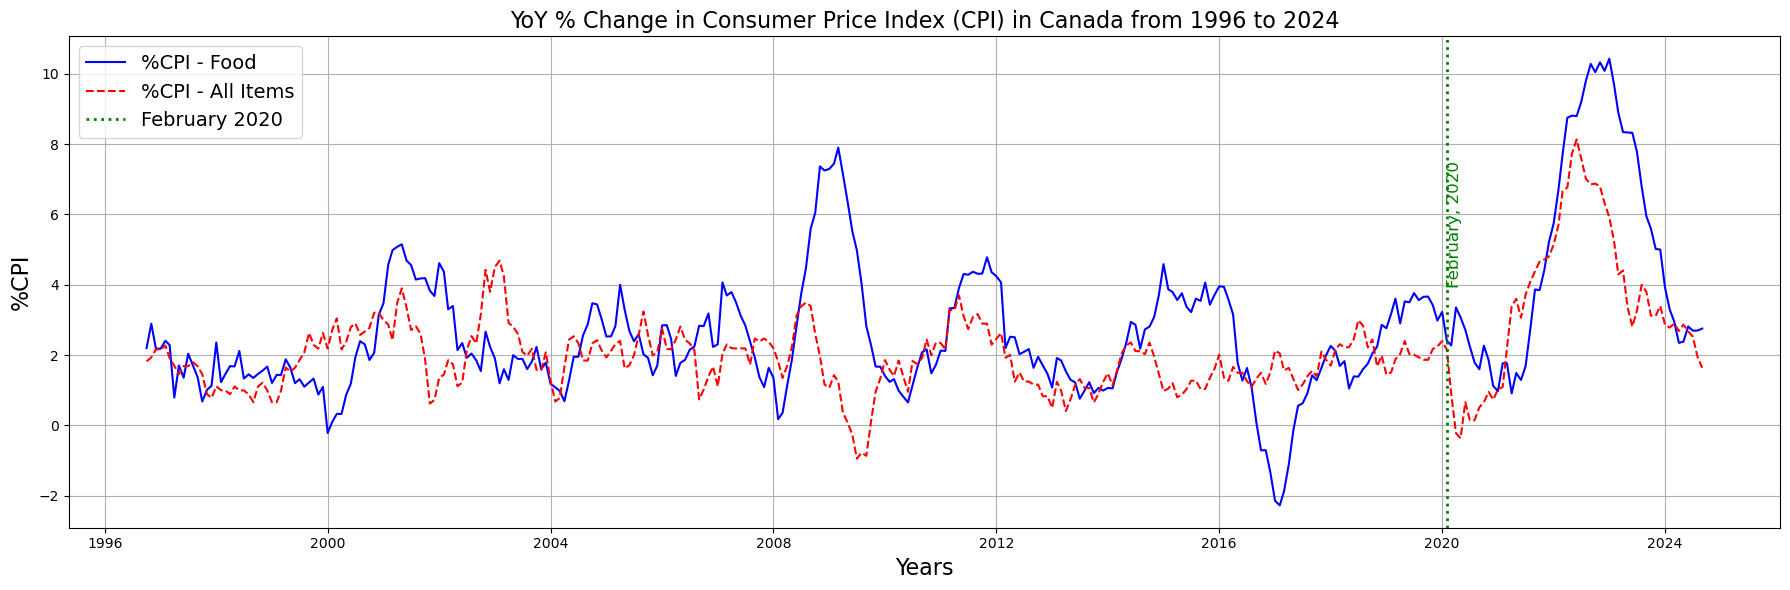

In [119]:
# Filter the dataframes between 2017 and 2024
filtered_food = df_consumer_price_index_filtered[
    (df_consumer_price_index_filtered['REF_DATE'] >= '1996-01-01') &
    (df_consumer_price_index_filtered['REF_DATE'] <= '2024-09-01')
]

filtered_all_items = df_consumer_price_index_allItems[
    (df_consumer_price_index_allItems['REF_DATE'] >= '1996-01-01') &
    (df_consumer_price_index_allItems['REF_DATE'] <= '2024-09-01')
]

# Create a single plot
plt.figure(figsize=(18, 6))

# Plot the filtered food data
plt.plot(
    filtered_food['REF_DATE'], 
    filtered_food['%CPI'], 
    linestyle='-', 
    color='b', 
    label='%CPI - Food'
)

# Plot the filtered all-items data
plt.plot(
    filtered_all_items['REF_DATE'], 
    filtered_all_items['%CPI'], 
    linestyle='--', 
    color='r', 
    label='%CPI - All Items'
)

# Add a vertical line at February 2020
feb_2020 = pd.to_datetime('2020-02-01')  # Date for February 2020
plt.axvline(x=feb_2020, color='g', linestyle=':', linewidth=2, label='February 2020')

# Add a label for the vertical line
plt.text(
    feb_2020, 
    max(df_consumer_price_index_filtered['VALUE'].max(), df_consumer_price_index_allItems['VALUE'].max()) * 0.03, 
    'February, 2020', 
    color='g', 
    fontsize=12, 
    rotation=90, 
    verticalalignment='center'
)

# Add labels, title, grid, and legend
plt.xlabel('Years', fontsize=16)
plt.ylabel('%CPI', fontsize=16)
plt.title('YoY % Change in Consumer Price Index (CPI) in Canada from 1996 to 2024', fontsize=16)
plt.grid(True)
plt.legend(loc='upper left', fontsize=14)

# Save the plot as an image
plt.savefig('PerCPI_Food1996_2024.png', format='png', dpi=300)

plt.tight_layout()
plt.show()


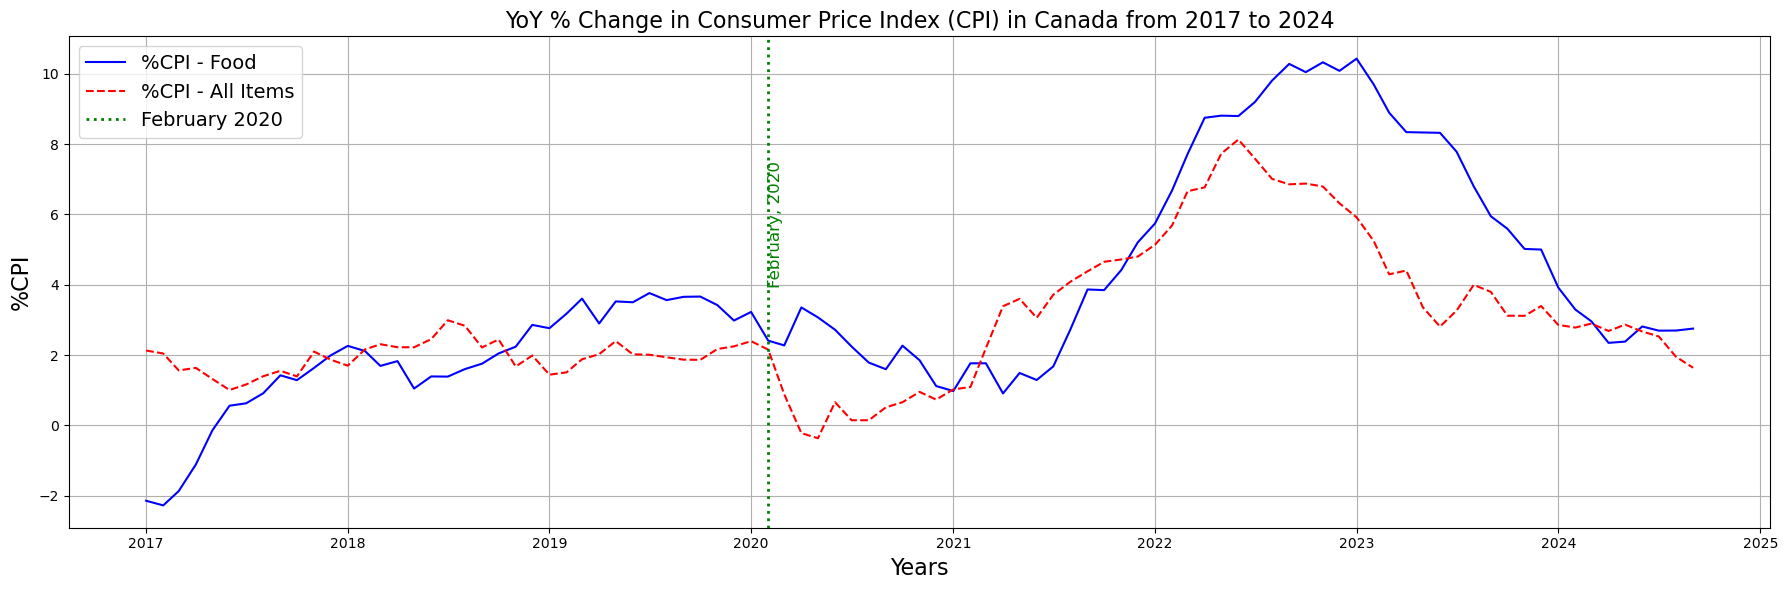

In [121]:
# Filter the dataframes between 2017 and 2024
filtered_food = df_consumer_price_index_filtered[
    (df_consumer_price_index_filtered['REF_DATE'] >= '2017-01-01') &
    (df_consumer_price_index_filtered['REF_DATE'] <= '2024-09-01')
]

filtered_all_items = df_consumer_price_index_allItems[
    (df_consumer_price_index_allItems['REF_DATE'] >= '2017-01-01') &
    (df_consumer_price_index_allItems['REF_DATE'] <= '2024-09-01')
]

# Create a single plot
plt.figure(figsize=(18, 6))

# Plot the filtered food data
plt.plot(
    filtered_food['REF_DATE'], 
    filtered_food['%CPI'], 
    linestyle='-', 
    color='b', 
    label='%CPI - Food'
)

# Plot the filtered all-items data
plt.plot(
    filtered_all_items['REF_DATE'], 
    filtered_all_items['%CPI'], 
    linestyle='--', 
    color='r', 
    label='%CPI - All Items'
)

# Add a vertical line at February 2020
feb_2020 = pd.to_datetime('2020-02-01')  # Date for February 2020
plt.axvline(x=feb_2020, color='g', linestyle=':', linewidth=2, label='February 2020')

# Add a label for the vertical line
plt.text(
    feb_2020, 
    max(df_consumer_price_index_filtered['VALUE'].max(), df_consumer_price_index_allItems['VALUE'].max()) * 0.03, 
    'February, 2020', 
    color='g', 
    fontsize=12, 
    rotation=90, 
    verticalalignment='center'
)

# Add labels, title, grid, and legend
plt.xlabel('Years', fontsize=16)
plt.ylabel('%CPI', fontsize=16)
plt.title('YoY % Change in Consumer Price Index (CPI) in Canada from 2017 to 2024', fontsize=16)
plt.grid(True)
plt.legend(loc='upper left', fontsize=14)

# Save the plot as an image
plt.savefig('PerCPI_FoodvsCanada1996_2024.png', format='png', dpi=300)

plt.tight_layout()
plt.show()


In [137]:
# Filter for Food Basket in Canada
df_consumer_price_index_FoodBasket = df_consumer_price_index_food[(df_consumer_price_index_food['GEO'] == 'Canada')]

In [143]:
# Convert dates to datetime format
df_consumer_price_index_FoodBasket['REF_DATE'] = pd.to_datetime(df_consumer_price_index_FoodBasket['REF_DATE'], format='%Y-%m')

In [145]:
# SORT BY DATE AND PRODUCT GROUPS
df_consumer_price_index_FoodBasket = df_consumer_price_index_FoodBasket.sort_values(
    by=['REF_DATE', 'Products and product groups']
)

In [147]:
# Adding a new column "%CPI" to the dataframe
# Calculating the percentage change of CPI in Canada
df_consumer_price_index_FoodBasket['%CPI'] = (
    (df_consumer_price_index_FoodBasket['VALUE'] - df_consumer_price_index_FoodBasket['VALUE'].shift(108)) 
    * 100 / df_consumer_price_index_FoodBasket['VALUE'].shift(108)
)
df_consumer_price_index_FoodBasket.head(10)

,REF_DATE,GEO,DGUID,Products and product groups,SCALAR_FACTOR,VALUE,%CPI
0,1995-10-01,Canada,2016A000011124,All-items,units,87.7,NaN
1745,1995-10-01,Canada,2016A000011124,Bakery and cereal products (excluding baby food),units,89.9,NaN
1396,1995-10-01,Canada,2016A000011124,Dairy products and eggs,units,85.6,NaN
1047,1995-10-01,Canada,2016A000011124,"Fish, seafood and other marine products",units,89.0,NaN
349,1995-10-01,Canada,2016A000011124,Food,units,86.4,NaN
2094,1995-10-01,Canada,2016A000011124,"Fruit, fruit preparations and nuts",units,86.7,NaN
698,1995-10-01,Canada,2016A000011124,Meat,units,83.3,NaN
2792,1995-10-01,Canada,2016A000011124,Other food products and non-alcoholic beverages,units,94.9,NaN
2443,1995-10-01,Canada,2016A000011124,Vegetables and vegetable preparations,units,71.8,NaN
1,1995-11-01,Canada,2016A000011124,All-items,units,88.0,NaN


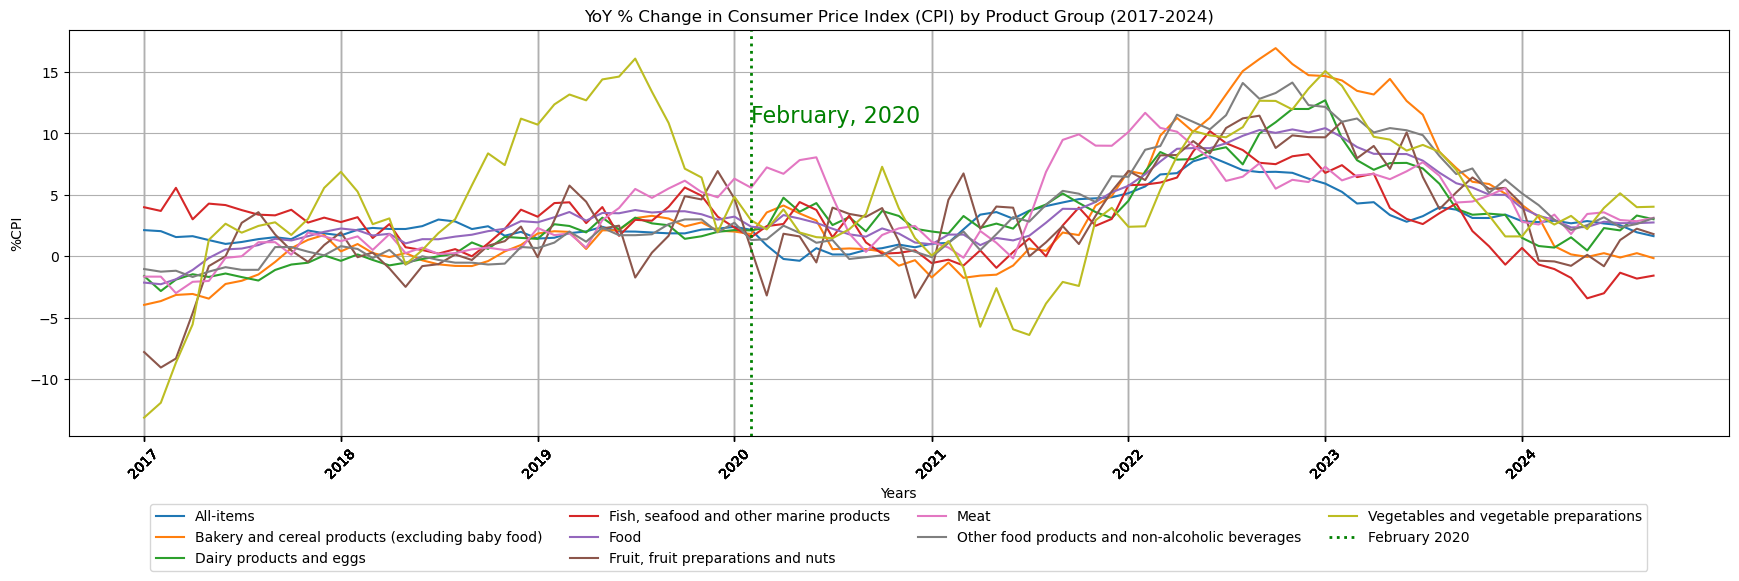

In [151]:
# Filter the data between 2017 and 2024
filtered_food_basket = df_consumer_price_index_FoodBasket[
    (df_consumer_price_index_FoodBasket['REF_DATE'] >= '2017-01-01') &
    (df_consumer_price_index_FoodBasket['REF_DATE'] <= '2024-09-01')
]

# Create the plot
plt.figure(figsize=(18, 6))

# Loop through each unique product group and plot the corresponding line
for product_group in filtered_food_basket['Products and product groups'].unique():
    # Filter data for the current product group
    product_data = filtered_food_basket[filtered_food_basket['Products and product groups'] == product_group]
    
    # Plot the line for the product group
    plt.plot(
        product_data['REF_DATE'], 
        product_data['%CPI'], 
        label=product_group
    )


# Add a vertical line at February 2020
feb_2020 = pd.to_datetime('2020-02-01')  # Date for February 2020
plt.axvline(x=feb_2020, color='g', linestyle=':', linewidth=2, label='February 2020')

# Add a label for the vertical line
plt.text(
    feb_2020, 
    max(df_consumer_price_index_filtered['VALUE'].max(), df_consumer_price_index_allItems['VALUE'].max()) * 0.06, 
    'February, 2020', 
    color='g', 
    fontsize=16, 
    rotation=0, 
    verticalalignment='center'
)


# Customize x-axis
january_dates = filtered_food_basket[filtered_food_basket['REF_DATE'].dt.month == 1]['REF_DATE']
january_labels = filtered_food_basket[filtered_food_basket['REF_DATE'].dt.month == 1]['REF_DATE'].dt.year

plt.xticks(ticks=january_dates, labels=january_labels, rotation=45)

# Add labels, title, grid, and legend
plt.xlabel('Years')
plt.ylabel('%CPI')
plt.title('YoY % Change in Consumer Price Index (CPI) by Product Group (2017-2024)')
plt.grid(True)

# Place legend at the bottom
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)  # Adjust ncol based on the number of items

# Save the plot as an image
plt.savefig('PerCPI_FoodType.png', format='png', dpi=300)

plt.tight_layout()
plt.show()


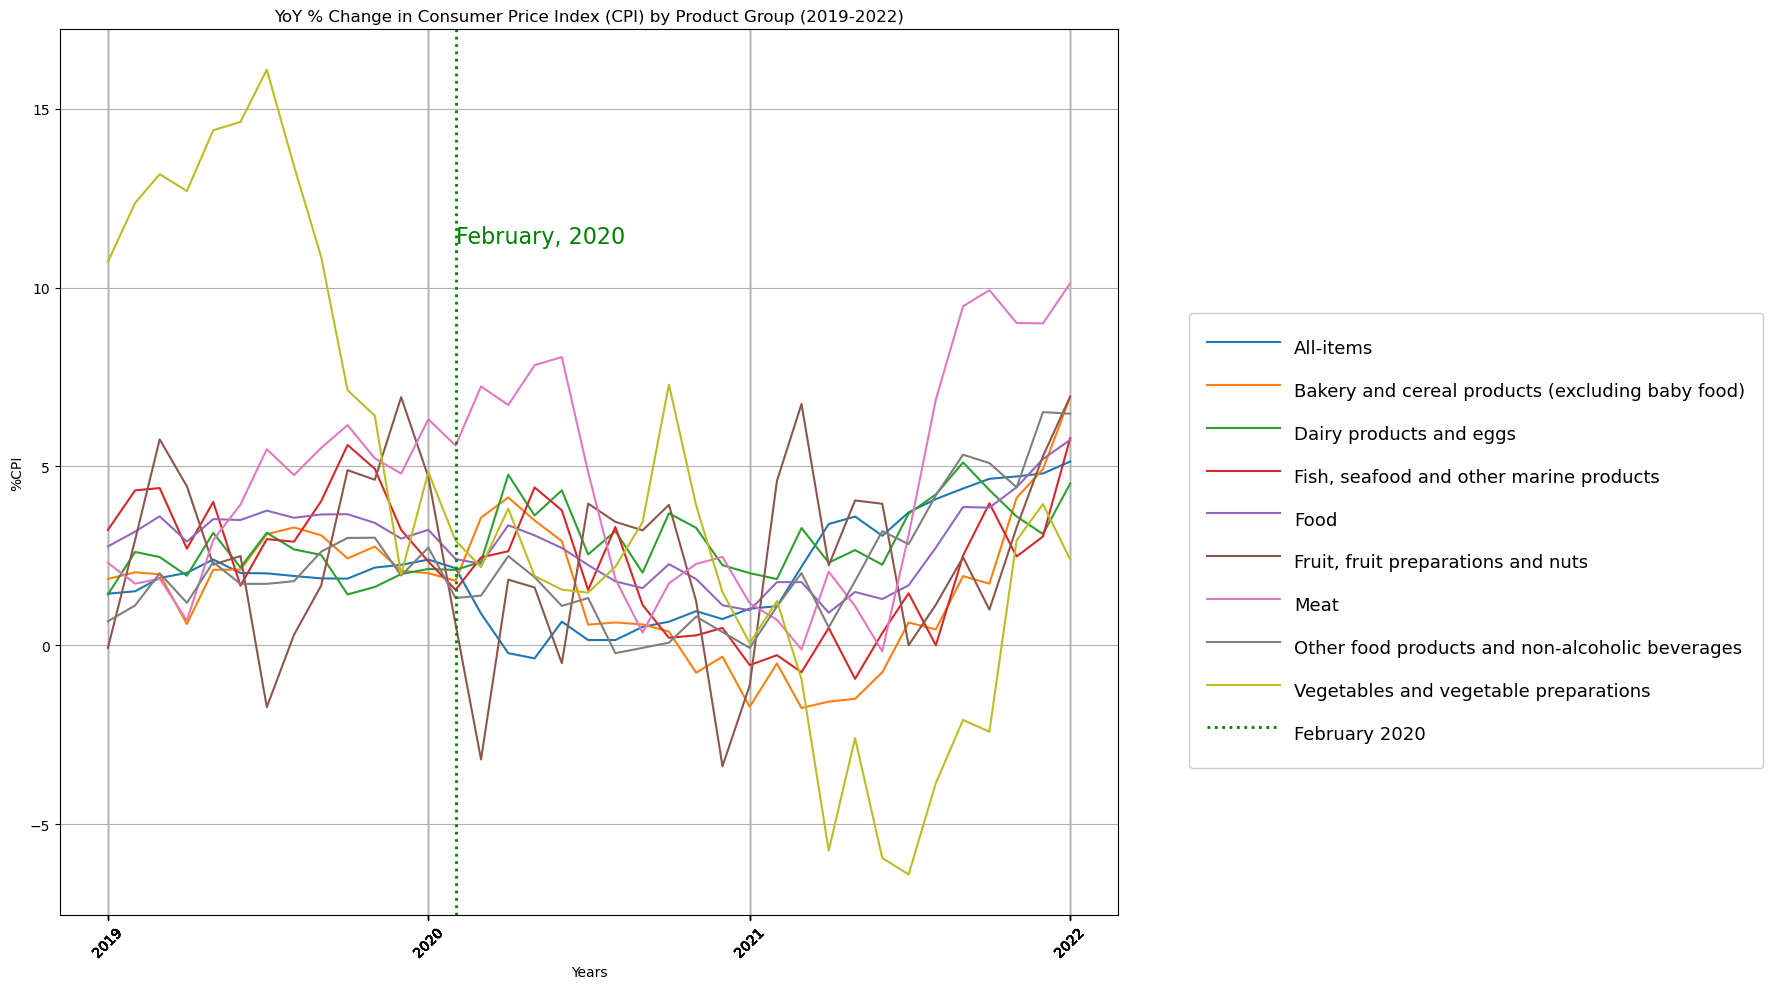

In [153]:
# Filter the data between 2017 and 2024
filtered_food_basket_2019_2022 = df_consumer_price_index_FoodBasket[
    (df_consumer_price_index_FoodBasket['REF_DATE'] >= '2019-01-01') &
    (df_consumer_price_index_FoodBasket['REF_DATE'] <= '2022-01-01')
]

# Create the plot
plt.figure(figsize=(18, 10))

# Loop through each unique product group and plot the corresponding line
for product_group in filtered_food_basket_2019_2022['Products and product groups'].unique():
    # Filter data for the current product group
    product_data = filtered_food_basket_2019_2022[filtered_food_basket_2019_2022['Products and product groups'] == product_group]
    
    # Plot the line for the product group
    plt.plot(
        product_data['REF_DATE'], 
        product_data['%CPI'], 
        label=product_group
    )

# Add a vertical line at February 2020
feb_2020 = pd.to_datetime('2020-02-01')  # Date for February 2020
plt.axvline(x=feb_2020, color='g', linestyle=':', linewidth=2, label='February 2020')

# Add a label for the vertical line
plt.text(
    feb_2020, 
    max(df_consumer_price_index_filtered['VALUE'].max(), df_consumer_price_index_allItems['VALUE'].max()) * 0.06, 
    'February, 2020', 
    color='g', 
    fontsize=16, 
    rotation=0, 
    verticalalignment='center'
)

# Customize x-axis
january_dates = filtered_food_basket_2019_2022[filtered_food_basket_2019_2022['REF_DATE'].dt.month == 1]['REF_DATE']
january_labels = filtered_food_basket_2019_2022[filtered_food_basket_2019_2022['REF_DATE'].dt.month == 1]['REF_DATE'].dt.year

plt.xticks(ticks=january_dates, labels=january_labels, rotation=45)

# Add labels, title, grid
plt.xlabel('Years')
plt.ylabel('%CPI')
plt.title('YoY % Change in Consumer Price Index (CPI) by Product Group (2019-2022)')
plt.grid(True)

# Place the legend on the right-hand side with increased font size
plt.legend(
    loc='upper left', 
    bbox_to_anchor=(1.05, 0.7),  # Place the legend to the right-hand side
    fontsize=13,  # Increased font size
    borderpad=1,  # Padding around the legend
    frameon=True,  # Show frame around legend
    framealpha=1,  # Solid frame
    borderaxespad=1,  # Padding between legend and axes
    handlelength=4,  # Length of lines in the legend
    handleheight=2.5,  # Height of lines in the legend
    markerscale=1  # Marker scale in the legend
)


# Save the plot as an image
plt.savefig('PerCPI_FoodType_2019_2022.png', format='png', dpi=300)


plt.tight_layout()
plt.show()


In [155]:
retail_ecommerce_sales = pd.read_csv('Retail e-commerce sales.csv', usecols=["REF_DATE",
                                                                    "e_comm",
                                                                    "in_store"
                                                                    ])
retail_ecommerce_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   REF_DATE  67 non-null     object 
 1   e_comm    67 non-null     float64
 2   in_store  67 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.7+ KB


In [157]:
# Ensure REF_DATE is in datetime format
retail_ecommerce_sales.loc[:, 'REF_DATE'] = pd.to_datetime(retail_ecommerce_sales['REF_DATE'], format='%Y-%m')

In [710]:
retail_ecommerce_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   REF_DATE  67 non-null     object 
 1   e_comm    67 non-null     float64
 2   in_store  67 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.7+ KB


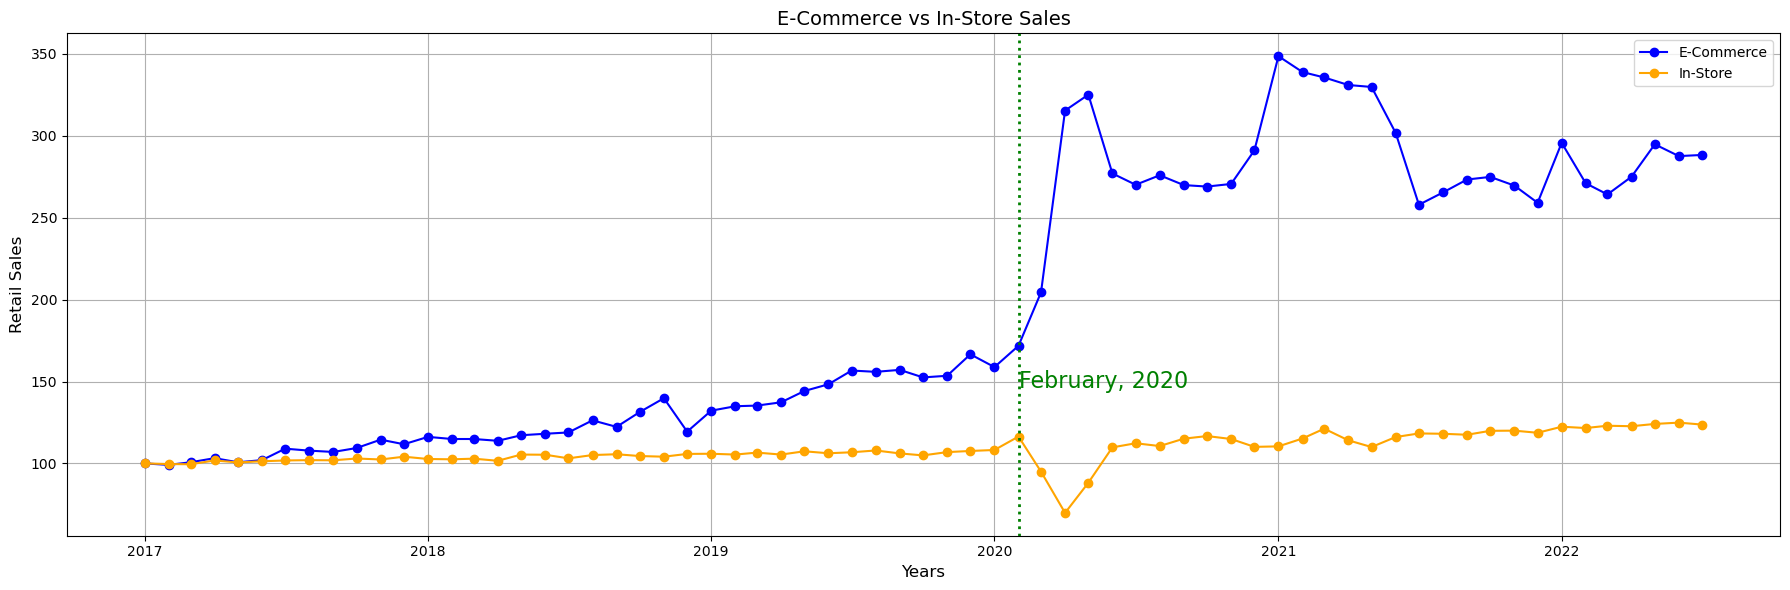

In [159]:
# Convert REF_DATE to datetime
retail_ecommerce_sales['REF_DATE'] = pd.to_datetime(retail_ecommerce_sales['REF_DATE'])

# Plot the data
plt.figure(figsize=(18, 6))
plt.plot(retail_ecommerce_sales['REF_DATE'], retail_ecommerce_sales['e_comm'], marker='o', label='E-Commerce', color='blue')
plt.plot(retail_ecommerce_sales['REF_DATE'], retail_ecommerce_sales['in_store'], marker='o', label='In-Store', color='orange')

# Add labels, title, and legend
plt.xlabel('Years', fontsize=12)
plt.ylabel('Retail Sales', fontsize=12)
plt.title('E-Commerce vs In-Store Sales', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)

# Add a vertical line at February 2020
feb_2020 = pd.to_datetime('2020-02-01')  # Date for February 2020
plt.axvline(x=feb_2020, color='g', linestyle=':', linewidth=2, label='February 2020')

# Add a label for the vertical line
plt.text(
    feb_2020, 
    max(retail_ecommerce_sales['in_store'].max(), retail_ecommerce_sales['in_store'].max()) * 1.2, 
    'February, 2020', 
    color='g', 
    fontsize=16, 
    rotation=0, 
    verticalalignment='center'
)

# Save the plot as an image
plt.savefig('ecomm.png', format='png', dpi=300)

# Show the plot
plt.tight_layout()
plt.show()